# Wind Energy Analysis for P2
## Pollux GRONIER, Gabriel Destal, Kenza Gueddas, Lara Normand
## Datasets : La Rochelle/Nîmes/Ouessant/Paris
### Date: [14/05/2025]

# 1 Study of your dataset

###  Load Data

#### Import libraries and load the datasets

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import weibull_min
from windrose import WindroseAxes
from matplotlib.gridspec import GridSpec
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.dates as mdates
from datetime import datetime

Paris= pd.read_csv('csv_Paris_48.85889_2.320041_fixed_23_180_PT30M.csv', parse_dates=['period_end'])
Ouessant = pd.read_csv('csv_Ouessant_48.455102_-5.097626_fixed_23_180_PT30M.csv', parse_dates=['period_end'])
Nimes = pd.read_csv('csv_Nimes_43.836699_4.360054_fixed_23_180_PT30M.csv', parse_dates=['period_end'])
La_Rochelle = pd.read_csv('csv_LaRochelle_46.160329_-1.151139_fixed_23_180_PT30M.csv', parse_dates=['period_end'])


# Dictionary to store datasets
locations = {
    'Paris': Paris,
    'Ouessant': Ouessant,
    'Nimes': Nimes,
    'La Rochelle': La_Rochelle
}



To be able to understand the dataset and do further analysis we need to see what colums and what info we can get. 

In [39]:
print("Paris columns:", Paris.columns.tolist())
print("Nimes columns:", Nimes.columns.tolist())
print("Ouessant columns:", Ouessant.columns.tolist())
print("La Rochelle columns:", La_Rochelle.columns.tolist())

Paris columns: ['air_temp', 'albedo', 'azimuth', 'clearsky_dhi', 'clearsky_dni', 'clearsky_ghi', 'clearsky_gti', 'cloud_opacity', 'dewpoint_temp', 'dhi', 'dni', 'ghi', 'gti', 'precipitable_water', 'precipitation_rate', 'relative_humidity', 'surface_pressure', 'snow_depth', 'snow_water_equivalent', 'snow_soiling_rooftop', 'snow_soiling_ground', 'wind_direction_100m', 'wind_direction_10m', 'wind_speed_100m', 'wind_speed_10m', 'zenith', 'period_end', 'period']
Nimes columns: ['air_temp', 'albedo', 'azimuth', 'clearsky_dhi', 'clearsky_dni', 'clearsky_ghi', 'clearsky_gti', 'cloud_opacity', 'dewpoint_temp', 'dhi', 'dni', 'ghi', 'gti', 'precipitable_water', 'precipitation_rate', 'relative_humidity', 'surface_pressure', 'snow_depth', 'snow_water_equivalent', 'snow_soiling_rooftop', 'snow_soiling_ground', 'wind_direction_100m', 'wind_direction_10m', 'wind_speed_100m', 'wind_speed_10m', 'zenith', 'period_end', 'period']
Ouessant columns: ['air_temp', 'albedo', 'azimuth', 'clearsky_dhi', 'clearsk

 After loading each DataFrame let's have a look at the datasets to see what were dealing with :

In [40]:
print("Paris sample:")
display(Paris.head())
print("Ouessant sample:")
display(Ouessant.head())
print("Nimes sample:")
display(Nimes.head())
print("La Rochelle sample:")
display(La_Rochelle.head())

Paris sample:


air_temp  albedo  azimuth  clearsky_dhi  clearsky_dni  clearsky_ghi  \
0         6    0.14      -11             0             0             0   
1         6    0.14      -26             0             0             0   
2         6    0.14      -39             0             0             0   
3         6    0.14      -50             0             0             0   
4         6    0.14      -60             0             0             0   

   clearsky_gti  cloud_opacity  dewpoint_temp  dhi  ...  \
0             0            0.0            4.9    0  ...   
1             0            0.0            4.8    0  ...   
2             0            0.0            4.7    0  ...   
3             0            0.0            4.6    0  ...   
4             0            0.0            4.6    0  ...   

   snow_water_equivalent  snow_soiling_rooftop  snow_soiling_ground  \
0                    0.0                     0                    0   
1                    0.0                     0                    0   
2                    0.0                     0                    0   
3                    0.0                     0                    0   
4                    0.0                     0                    0   

   wind_direction_100m  wind_direction_10m  wind_speed_100m  wind_speed_10m  \
0                  216                 211              8.8             4.7   
1                  216                 210              8.7             4.5   
2                  215                 209              8.7             4.5   
3                  213                 207              8.8             4.6   
4                  211                 206              8.8             4.7   

   zenith                period_end  period  
0     154 2014-01-01 00:30:00+00:00   PT30M  
1     152 2014-01-01 01:00:00+00:00   PT30M  
2     150 2014-01-01 01:30:00+00:00   PT30M  
3     146 2014-01-01 02:00:00+00:00   PT30M  
4     142 2014-01-01 02:30:00+00:00   PT30M  

[5 rows x 28 columns]

Ouessant sample:


air_temp  albedo  azimuth  clearsky_dhi  clearsky_dni  clearsky_ghi  \
0        11    0.14        4             0             0             0   
1        11    0.14      -12             0             0             0   
2        11    0.10      -27             0             0             0   
3        11    0.10      -40             0             0             0   
4        11    0.10      -51             0             0             0   

   clearsky_gti  cloud_opacity  dewpoint_temp  dhi  ...  \
0             0           53.0            7.3    0  ...   
1             0           52.8            7.4    0  ...   
2             0           53.8            7.3    0  ...   
3             0           53.8            7.2    0  ...   
4             0           53.8            7.0    0  ...   

   snow_water_equivalent  snow_soiling_rooftop  snow_soiling_ground  \
0                      0                     0                    0   
1                      0                     0                    0   
2                      0                     0                    0   
3                      0                     0                    0   
4                      0                     0                    0   

   wind_direction_100m  wind_direction_10m  wind_speed_100m  wind_speed_10m  \
0                  226                 226             15.4            12.8   
1                  222                 222             15.0            12.4   
2                  218                 218             14.7            12.3   
3                  215                 214             14.7            12.2   
4                  211                 210             14.7            12.3   

   zenith                period_end  period  
0     155 2014-01-01 00:30:00+00:00   PT30M  
1     154 2014-01-01 01:00:00+00:00   PT30M  
2     153 2014-01-01 01:30:00+00:00   PT30M  
3     150 2014-01-01 02:00:00+00:00   PT30M  
4     146 2014-01-01 02:30:00+00:00   PT30M  

[5 rows x 28 columns]

Nimes sample:


air_temp  albedo  azimuth  clearsky_dhi  clearsky_dni  clearsky_ghi  \
0         8    0.13      -19             0             0             0   
1         8    0.13      -35             0             0             0   
2         7    0.13      -49             0             0             0   
3         7    0.13      -59             0             0             0   
4         7    0.13      -68             0             0             0   

   clearsky_gti  cloud_opacity  dewpoint_temp  dhi  ...  \
0             0            0.0            5.2    0  ...   
1             0            0.0            5.1    0  ...   
2             0            0.0            5.0    0  ...   
3             0            0.0            5.0    0  ...   
4             0            0.0            5.0    0  ...   

   snow_water_equivalent  snow_soiling_rooftop  snow_soiling_ground  \
0                    0.0                     0                    0   
1                    0.0                     0                    0   
2                    0.0                     0                    0   
3                    0.0                     0                    0   
4                    0.0                     0                    0   

   wind_direction_100m  wind_direction_10m  wind_speed_100m  wind_speed_10m  \
0                  106                  83              4.7             1.9   
1                  104                  81              4.6             1.8   
2                  104                  80              4.5             1.8   
3                  104                  78              4.3             1.8   
4                  102                  73              4.0             1.7   

   zenith                period_end  period  
0     158 2014-01-01 00:30:00+00:00   PT30M  
1     156 2014-01-01 01:00:00+00:00   PT30M  
2     152 2014-01-01 01:30:00+00:00   PT30M  
3     148 2014-01-01 02:00:00+00:00   PT30M  
4     143 2014-01-01 02:30:00+00:00   PT30M  

[5 rows x 28 columns]

La Rochelle sample:


air_temp  albedo  azimuth  clearsky_dhi  clearsky_dni  clearsky_ghi  \
0         9    0.13       -4             0             0             0   
1         9    0.13      -21             0             0             0   
2         9    0.12      -36             0             0             0   
3         9    0.12      -49             0             0             0   
4         9    0.12      -59             0             0             0   

   clearsky_gti  cloud_opacity  dewpoint_temp  dhi  ...  \
0             0            0.0            6.6    0  ...   
1             0            0.0            6.7    0  ...   
2             0            0.0            6.9    0  ...   
3             0            0.0            7.0    0  ...   
4             0            0.0            7.1    0  ...   

   snow_water_equivalent  snow_soiling_rooftop  snow_soiling_ground  \
0                    0.0                     0                    0   
1                    0.0                     0                    0   
2                    0.0                     0                    0   
3                    0.0                     0                    0   
4                    0.0                     0                    0   

   wind_direction_100m  wind_direction_10m  wind_speed_100m  wind_speed_10m  \
0                  221                 217              8.4             4.7   
1                  220                 216              8.4             4.8   
2                  219                 215              8.5             4.9   
3                  219                 214              8.6             5.0   
4                  217                 212              8.8             5.1   

   zenith                period_end  period  
0     157 2014-01-01 00:30:00+00:00   PT30M  
1     156 2014-01-01 01:00:00+00:00   PT30M  
2     153 2014-01-01 01:30:00+00:00   PT30M  
3     150 2014-01-01 02:00:00+00:00   PT30M  
4     145 2014-01-01 02:30:00+00:00   PT30M  

[5 rows x 28 columns]

Is there any null values in the datasets?

In [41]:
print("Nimes null counts:\n")
display(Nimes.isnull().sum())
print("Ouessant null counts:\n")
display(Ouessant.isnull().sum())
print("La Rochelle null counts:\n")
display(La_Rochelle.isnull().sum())
print("Paris null counts:\n")
display(Paris.isnull().sum())


Nimes null counts:



air_temp                 0
albedo                   0
azimuth                  0
clearsky_dhi             0
clearsky_dni             0
clearsky_ghi             0
clearsky_gti             0
cloud_opacity            0
dewpoint_temp            0
dhi                      0
dni                      0
ghi                      0
gti                      0
precipitable_water       0
precipitation_rate       0
relative_humidity        0
surface_pressure         0
snow_depth               0
snow_water_equivalent    0
snow_soiling_rooftop     0
snow_soiling_ground      0
wind_direction_100m      0
wind_direction_10m       0
wind_speed_100m          0
wind_speed_10m           0
zenith                   0
period_end               0
period                   0
dtype: int64

Ouessant null counts:



air_temp                 0
albedo                   0
azimuth                  0
clearsky_dhi             0
clearsky_dni             0
clearsky_ghi             0
clearsky_gti             0
cloud_opacity            0
dewpoint_temp            0
dhi                      0
dni                      0
ghi                      0
gti                      0
precipitable_water       0
precipitation_rate       0
relative_humidity        0
surface_pressure         0
snow_depth               0
snow_water_equivalent    0
snow_soiling_rooftop     0
snow_soiling_ground      0
wind_direction_100m      0
wind_direction_10m       0
wind_speed_100m          0
wind_speed_10m           0
zenith                   0
period_end               0
period                   0
dtype: int64

La Rochelle null counts:



air_temp                 0
albedo                   0
azimuth                  0
clearsky_dhi             0
clearsky_dni             0
clearsky_ghi             0
clearsky_gti             0
cloud_opacity            0
dewpoint_temp            0
dhi                      0
dni                      0
ghi                      0
gti                      0
precipitable_water       0
precipitation_rate       0
relative_humidity        0
surface_pressure         0
snow_depth               0
snow_water_equivalent    0
snow_soiling_rooftop     0
snow_soiling_ground      0
wind_direction_100m      0
wind_direction_10m       0
wind_speed_100m          0
wind_speed_10m           0
zenith                   0
period_end               0
period                   0
dtype: int64

Paris null counts:



air_temp                 0
albedo                   0
azimuth                  0
clearsky_dhi             0
clearsky_dni             0
clearsky_ghi             0
clearsky_gti             0
cloud_opacity            0
dewpoint_temp            0
dhi                      0
dni                      0
ghi                      0
gti                      0
precipitable_water       0
precipitation_rate       0
relative_humidity        0
surface_pressure         0
snow_depth               0
snow_water_equivalent    0
snow_soiling_rooftop     0
snow_soiling_ground      0
wind_direction_100m      0
wind_direction_10m       0
wind_speed_100m          0
wind_speed_10m           0
zenith                   0
period_end               0
period                   0
dtype: int64

No null values, so we actually have pretty clean data, so very light processing we just select the columns that are needed for our analysis.


## Delete all non-wind-related and time-related features from your dataset

In [42]:
def clean_wind_data(df, location_name):
    """
    Extract only wind-related and time-related features from dataset
    Returns a clean DataFrame with only relevant columns
    """
    # Select only wind-related and time-related columns
    wind_cols = ['period_end','wind_direction_10m','wind_direction_100m',
    'wind_speed_10m', 'wind_speed_100m']
    df_wind = df[wind_cols].copy()
    
    print(f"{location_name} wind data shape: {df_wind.shape}")
    print(f"Selected columns: {wind_cols}")
    
    return df_wind

# Process each location
wind_data = {}
for location, df in locations.items():
    wind_data[location] = clean_wind_data(df, location)
    


#display sample of cleaned data for each location as well as the shape of the cleaned data.
print("\n cleaned wind data for Paris:")
display(wind_data['Paris'].head())
print("\n cleaned wind data for Ouessant:")
display(wind_data['Ouessant'].head())
print("\n cleaned wind data for Nimes:")
display(wind_data['Nimes'].head())
print("\n cleaned wind data for La Rochelle:")
display(wind_data['La Rochelle'].head())


Paris wind data shape: (175344, 5)
Selected columns: ['period_end', 'wind_direction_10m', 'wind_direction_100m', 'wind_speed_10m', 'wind_speed_100m']
Ouessant wind data shape: (175344, 5)
Selected columns: ['period_end', 'wind_direction_10m', 'wind_direction_100m', 'wind_speed_10m', 'wind_speed_100m']
Nimes wind data shape: (175344, 5)
Selected columns: ['period_end', 'wind_direction_10m', 'wind_direction_100m', 'wind_speed_10m', 'wind_speed_100m']
La Rochelle wind data shape: (175344, 5)
Selected columns: ['period_end', 'wind_direction_10m', 'wind_direction_100m', 'wind_speed_10m', 'wind_speed_100m']

 cleaned wind data for Paris:


period_end  wind_direction_10m  wind_direction_100m  \
0 2014-01-01 00:30:00+00:00                 211                  216   
1 2014-01-01 01:00:00+00:00                 210                  216   
2 2014-01-01 01:30:00+00:00                 209                  215   
3 2014-01-01 02:00:00+00:00                 207                  213   
4 2014-01-01 02:30:00+00:00                 206                  211   

   wind_speed_10m  wind_speed_100m  
0             4.7              8.8  
1             4.5              8.7  
2             4.5              8.7  
3             4.6              8.8  
4             4.7              8.8


 cleaned wind data for Ouessant:


period_end  wind_direction_10m  wind_direction_100m  \
0 2014-01-01 00:30:00+00:00                 226                  226   
1 2014-01-01 01:00:00+00:00                 222                  222   
2 2014-01-01 01:30:00+00:00                 218                  218   
3 2014-01-01 02:00:00+00:00                 214                  215   
4 2014-01-01 02:30:00+00:00                 210                  211   

   wind_speed_10m  wind_speed_100m  
0            12.8             15.4  
1            12.4             15.0  
2            12.3             14.7  
3            12.2             14.7  
4            12.3             14.7


 cleaned wind data for Nimes:


period_end  wind_direction_10m  wind_direction_100m  \
0 2014-01-01 00:30:00+00:00                  83                  106   
1 2014-01-01 01:00:00+00:00                  81                  104   
2 2014-01-01 01:30:00+00:00                  80                  104   
3 2014-01-01 02:00:00+00:00                  78                  104   
4 2014-01-01 02:30:00+00:00                  73                  102   

   wind_speed_10m  wind_speed_100m  
0             1.9              4.7  
1             1.8              4.6  
2             1.8              4.5  
3             1.8              4.3  
4             1.7              4.0


 cleaned wind data for La Rochelle:


period_end  wind_direction_10m  wind_direction_100m  \
0 2014-01-01 00:30:00+00:00                 217                  221   
1 2014-01-01 01:00:00+00:00                 216                  220   
2 2014-01-01 01:30:00+00:00                 215                  219   
3 2014-01-01 02:00:00+00:00                 214                  219   
4 2014-01-01 02:30:00+00:00                 212                  217   

   wind_speed_10m  wind_speed_100m  
0             4.7              8.4  
1             4.8              8.4  
2             4.9              8.5  
3             5.0              8.6  
4             5.1              8.8

## Extract a sub-dataset corresponding to exactly one year

In [43]:
# Function to extract exactly one year of data
def extract_year(df, year=2014):
    """
    Extract data for a specific year and verify completeness
    Returns DataFrame for the specified year
    """
    # Set datetime as index
    df = df.set_index('period_end')
    
    # Filter for the specified year
    year_data = df[f"{year}-01-01":f"{year}-12-31"]
    
    return year_data

# Process each location
annual_wind_data = {}
for location, df in wind_data.items():
    annual_wind_data[location] = extract_year(df)
    print(f"{location} annual data shape: {annual_wind_data[location].shape}")

# Display sample of annual data
print("\nSample of 2014 data for Paris:")
display(annual_wind_data['Paris'].head())

print("\nSample of 2014 data for Nimes:")
display(annual_wind_data['Nimes'].head())

print("\nSample of 2014 data for La Rochelle:")
display(annual_wind_data['La Rochelle'].head())

print("\nSample of 2014 data for Ouessant:")
display(annual_wind_data['Ouessant'].head())

Paris annual data shape: (17519, 4)
Ouessant annual data shape: (17519, 4)
Nimes annual data shape: (17519, 4)
La Rochelle annual data shape: (17519, 4)

Sample of 2014 data for Paris:


wind_direction_10m  wind_direction_100m  \
period_end                                                           
2014-01-01 00:30:00+00:00                 211                  216   
2014-01-01 01:00:00+00:00                 210                  216   
2014-01-01 01:30:00+00:00                 209                  215   
2014-01-01 02:00:00+00:00                 207                  213   
2014-01-01 02:30:00+00:00                 206                  211   

                           wind_speed_10m  wind_speed_100m  
period_end                                                  
2014-01-01 00:30:00+00:00             4.7              8.8  
2014-01-01 01:00:00+00:00             4.5              8.7  
2014-01-01 01:30:00+00:00             4.5              8.7  
2014-01-01 02:00:00+00:00             4.6              8.8  
2014-01-01 02:30:00+00:00             4.7              8.8


Sample of 2014 data for Nimes:


wind_direction_10m  wind_direction_100m  \
period_end                                                           
2014-01-01 00:30:00+00:00                  83                  106   
2014-01-01 01:00:00+00:00                  81                  104   
2014-01-01 01:30:00+00:00                  80                  104   
2014-01-01 02:00:00+00:00                  78                  104   
2014-01-01 02:30:00+00:00                  73                  102   

                           wind_speed_10m  wind_speed_100m  
period_end                                                  
2014-01-01 00:30:00+00:00             1.9              4.7  
2014-01-01 01:00:00+00:00             1.8              4.6  
2014-01-01 01:30:00+00:00             1.8              4.5  
2014-01-01 02:00:00+00:00             1.8              4.3  
2014-01-01 02:30:00+00:00             1.7              4.0


Sample of 2014 data for La Rochelle:


wind_direction_10m  wind_direction_100m  \
period_end                                                           
2014-01-01 00:30:00+00:00                 217                  221   
2014-01-01 01:00:00+00:00                 216                  220   
2014-01-01 01:30:00+00:00                 215                  219   
2014-01-01 02:00:00+00:00                 214                  219   
2014-01-01 02:30:00+00:00                 212                  217   

                           wind_speed_10m  wind_speed_100m  
period_end                                                  
2014-01-01 00:30:00+00:00             4.7              8.4  
2014-01-01 01:00:00+00:00             4.8              8.4  
2014-01-01 01:30:00+00:00             4.9              8.5  
2014-01-01 02:00:00+00:00             5.0              8.6  
2014-01-01 02:30:00+00:00             5.1              8.8


Sample of 2014 data for Ouessant:


wind_direction_10m  wind_direction_100m  \
period_end                                                           
2014-01-01 00:30:00+00:00                 226                  226   
2014-01-01 01:00:00+00:00                 222                  222   
2014-01-01 01:30:00+00:00                 218                  218   
2014-01-01 02:00:00+00:00                 214                  215   
2014-01-01 02:30:00+00:00                 210                  211   

                           wind_speed_10m  wind_speed_100m  
period_end                                                  
2014-01-01 00:30:00+00:00            12.8             15.4  
2014-01-01 01:00:00+00:00            12.4             15.0  
2014-01-01 01:30:00+00:00            12.3             14.7  
2014-01-01 02:00:00+00:00            12.2             14.7  
2014-01-01 02:30:00+00:00            12.3             14.7

## Plot the three wind-related features as a function of time spanning the whole year


### Distinclty compiled:

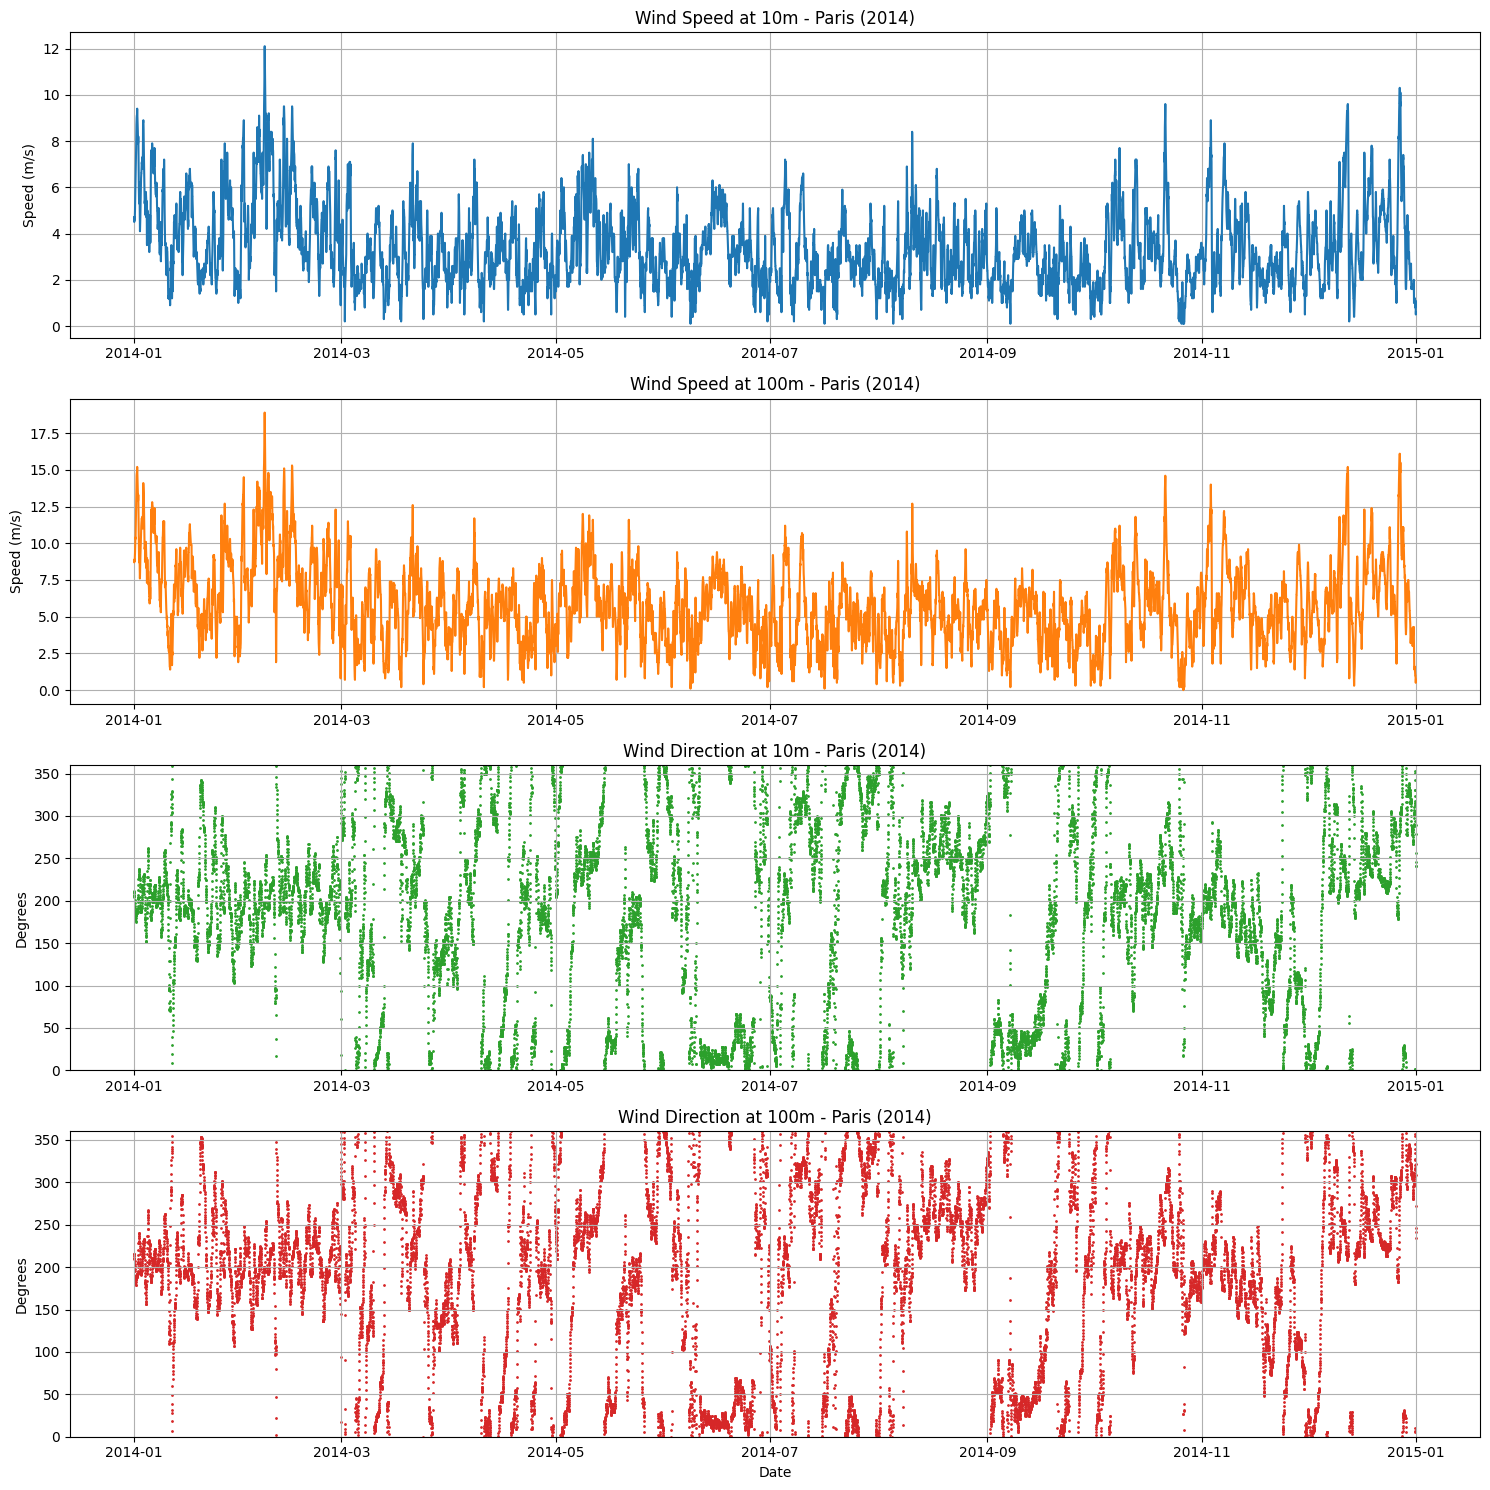

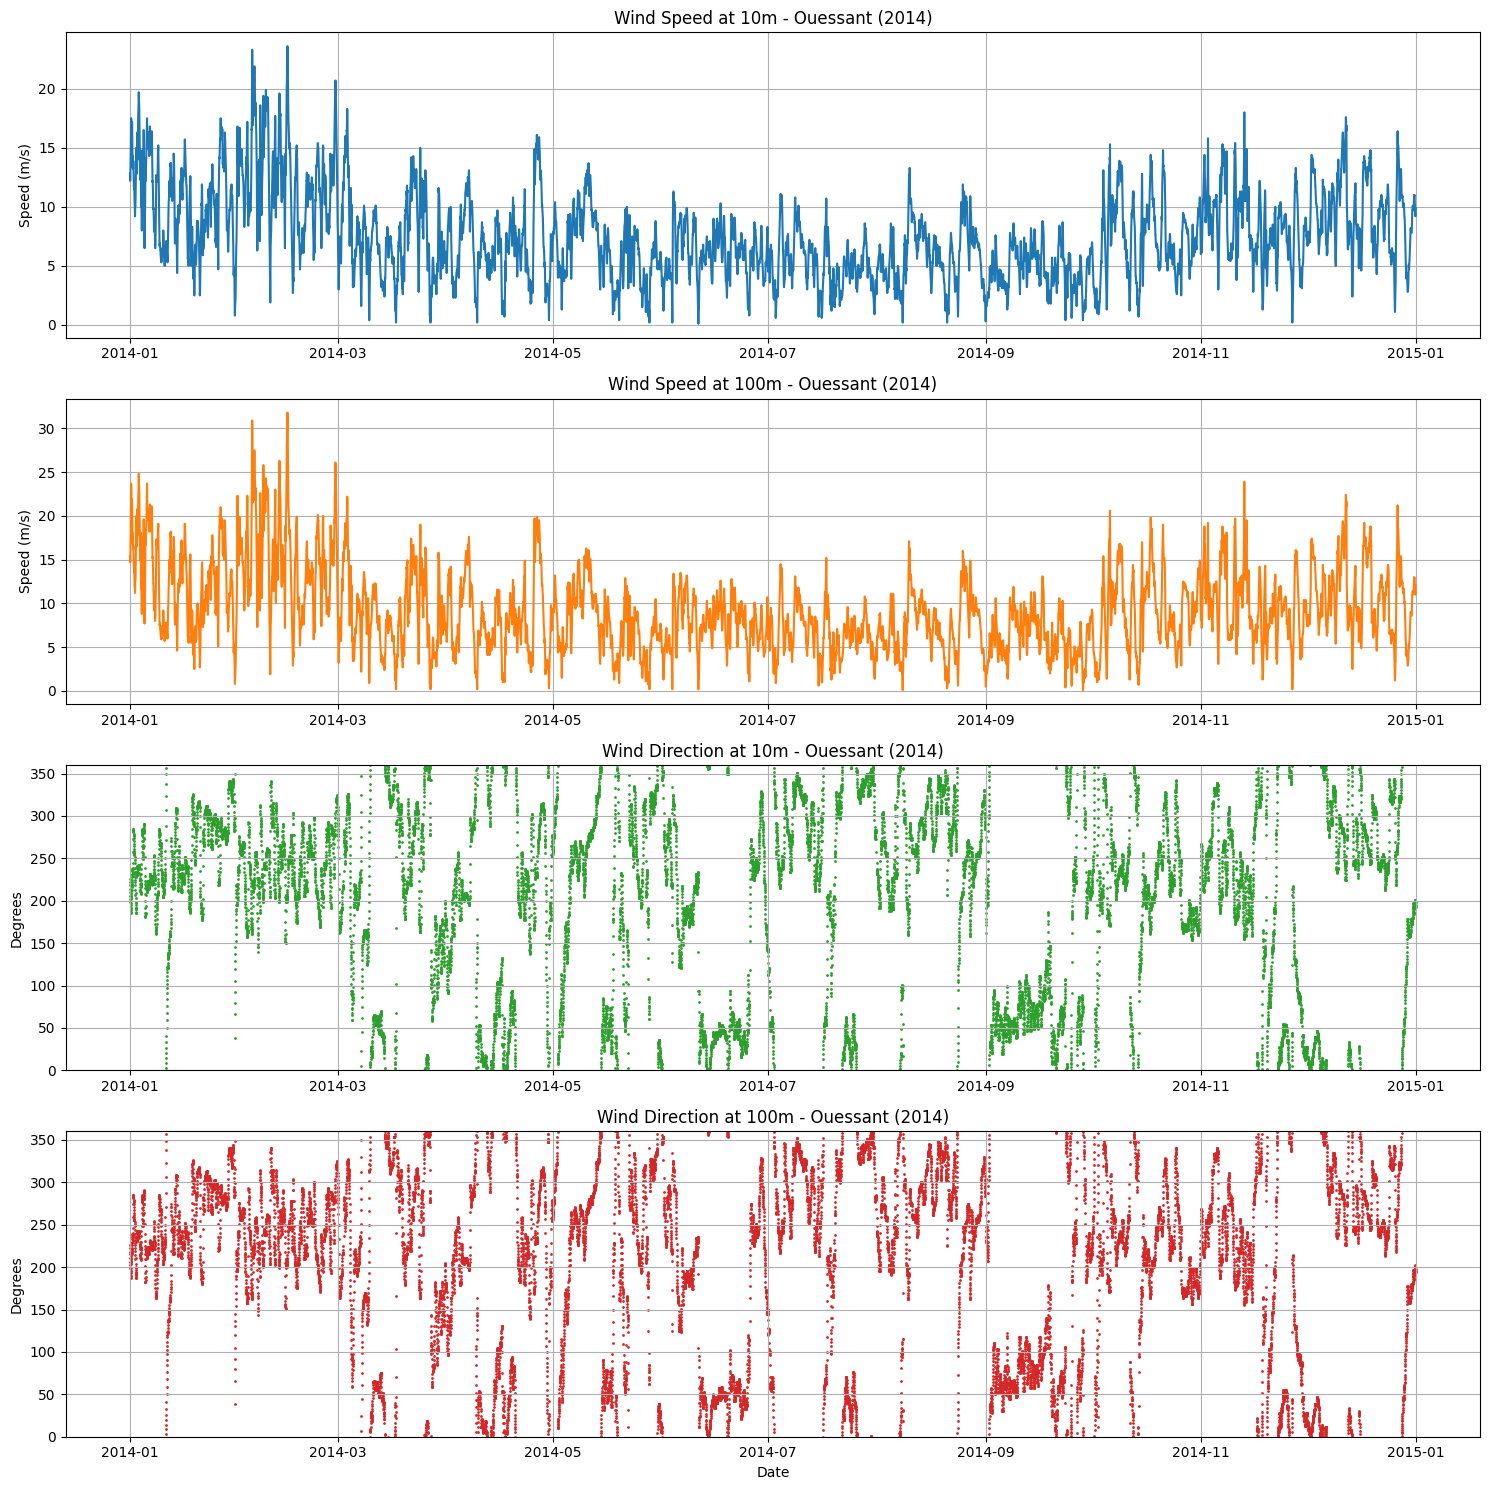

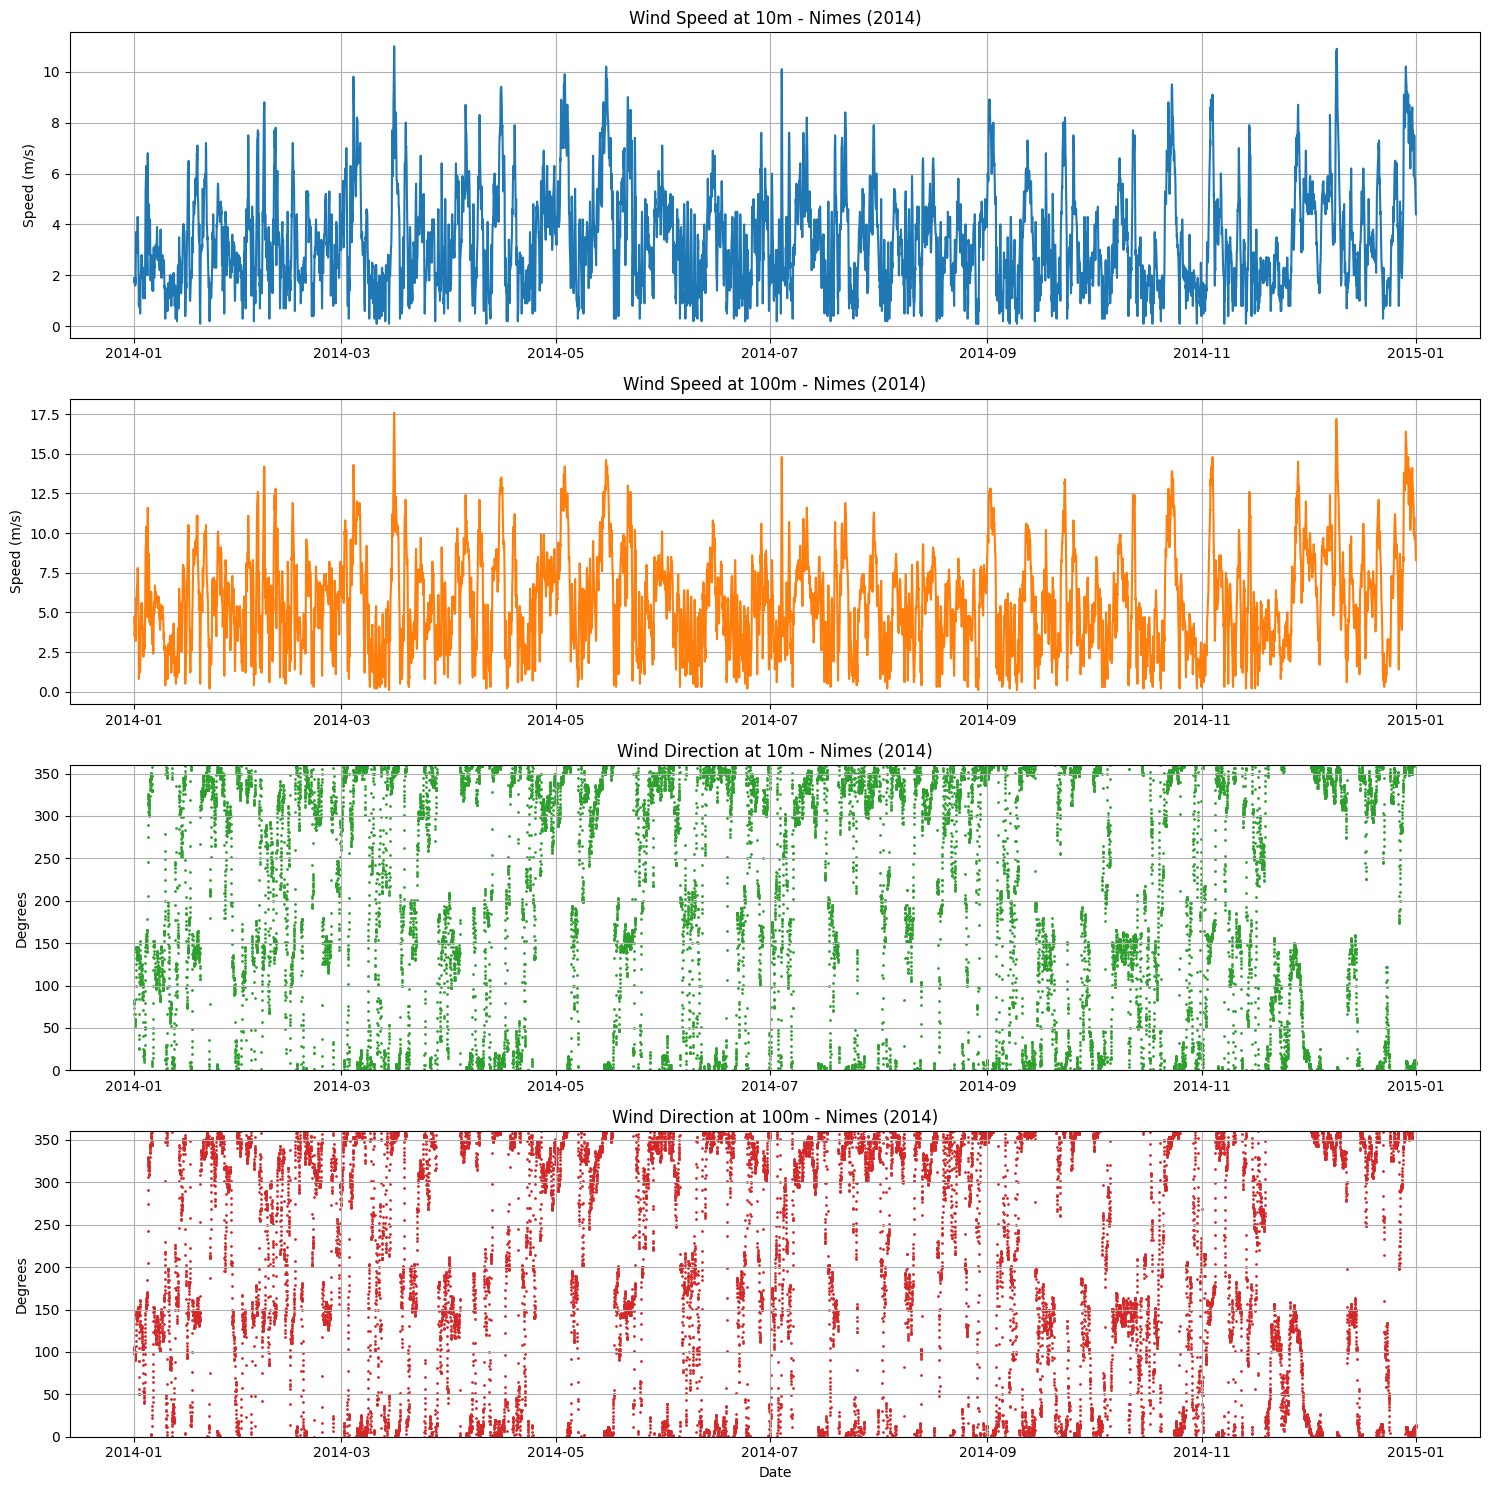

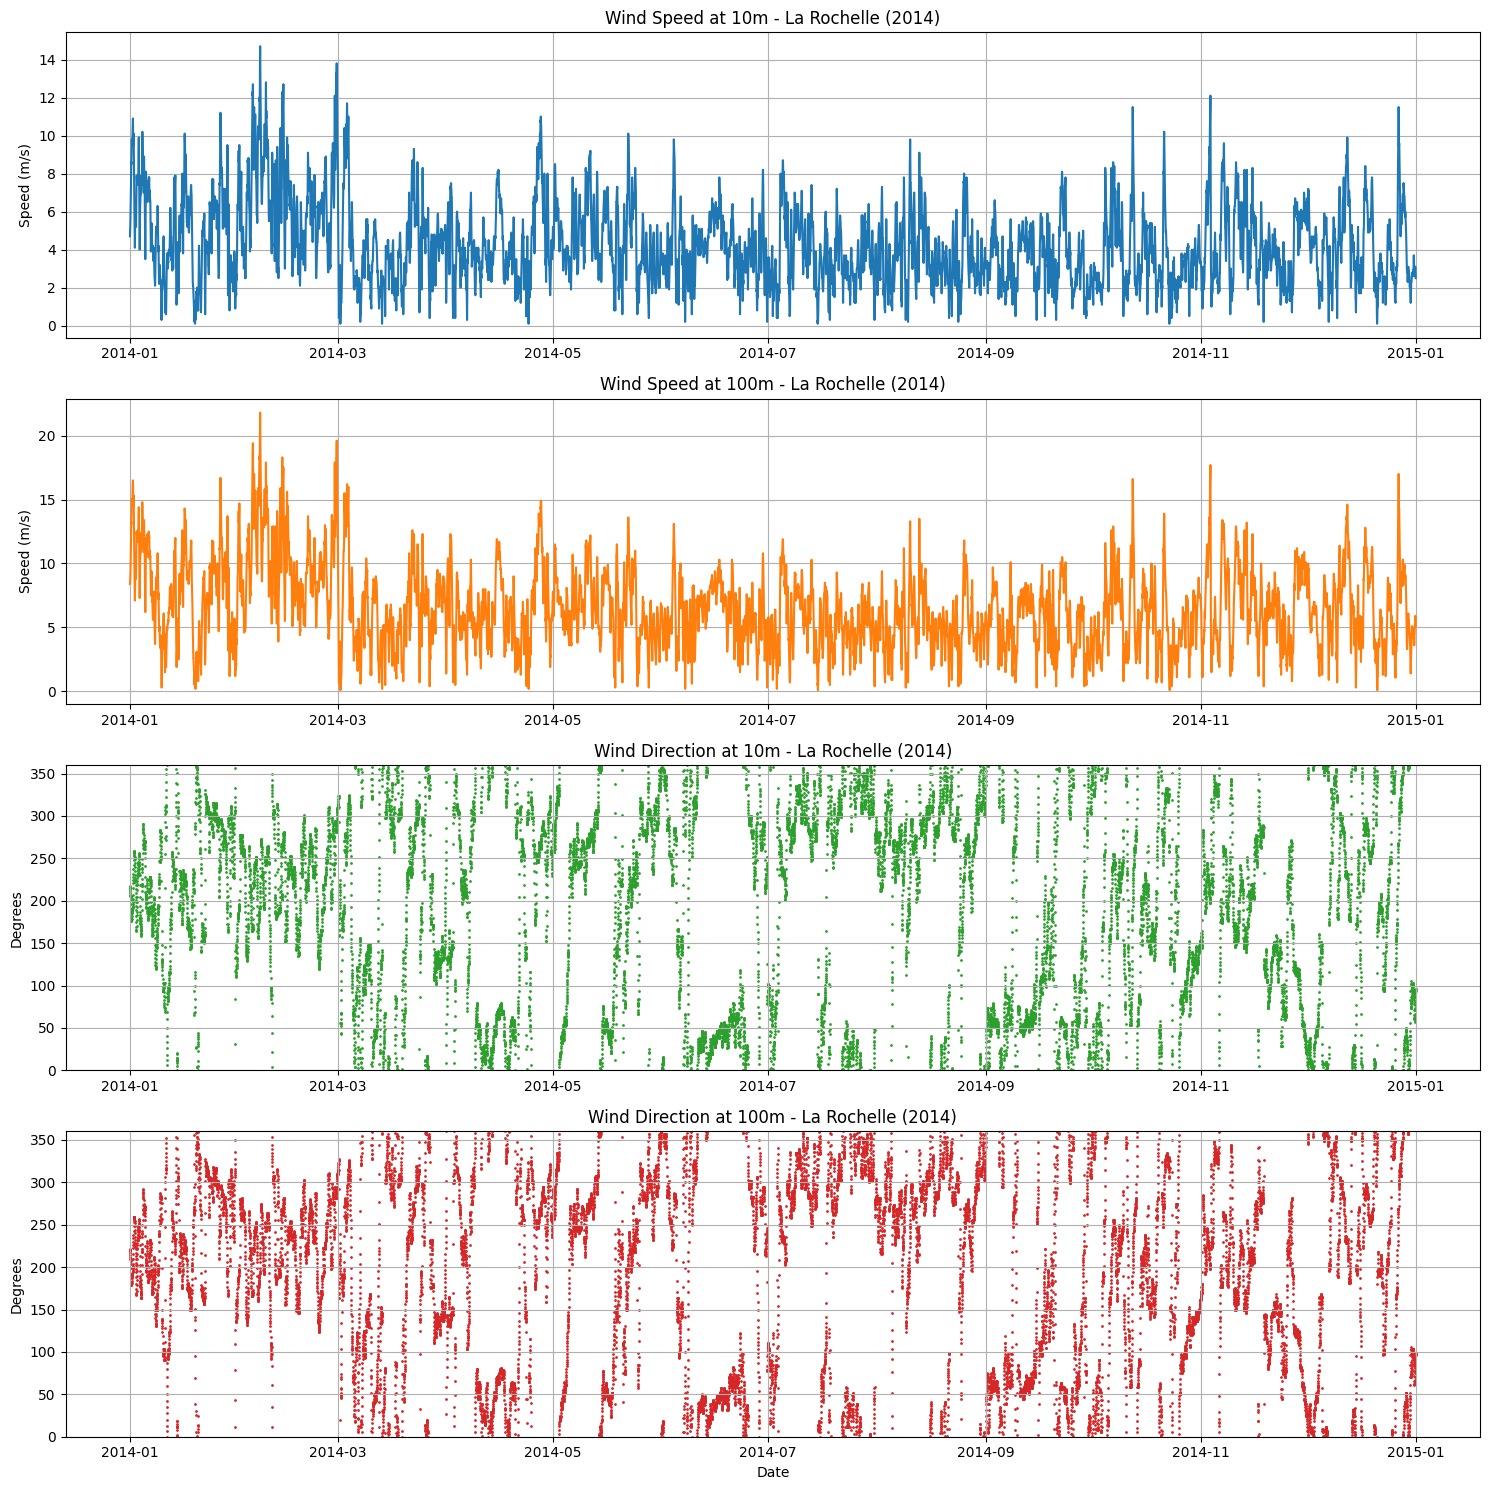

In [44]:
def plot_wind_features(df, location):
    """Plot the four wind-related features over the entire year"""
    plt.figure(figsize=(15, 15))  # Increased figure height
    
    # Plot Wind Speed at 10m
    plt.subplot(4, 1, 1)
    plt.plot(df.index, df['wind_speed_10m'], color='tab:blue')
    plt.title(f'Wind Speed at 10m - {location} (2014)')
    plt.ylabel('Speed (m/s)')
    plt.grid(True)
    
    # Plot Wind Speed at 100m
    plt.subplot(4, 1, 2)
    plt.plot(df.index, df['wind_speed_100m'], color='tab:orange')
    plt.title(f'Wind Speed at 100m - {location} (2014)')
    plt.ylabel('Speed (m/s)')
    plt.grid(True)
    
    # Plot Wind Direction at 10m
    plt.subplot(4, 1, 3)
    plt.scatter(df.index, df['wind_direction_10m'], s=1, color='tab:green')
    plt.title(f'Wind Direction at 10m - {location} (2014)')
    plt.ylabel('Degrees')
    plt.ylim(0, 360)
    plt.grid(True)
    
    # Plot Wind Direction at 100m
    plt.subplot(4, 1, 4)
    plt.scatter(df.index, df['wind_direction_100m'], s=1, color='tab:red')
    plt.title(f'Wind Direction at 100m - {location} (2014)')
    plt.ylabel('Degrees')
    plt.xlabel('Date')
    plt.ylim(0, 360)
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# Generate plots for each location
for location, df in annual_wind_data.items():
    plot_wind_features(df, location)

### Compiled for Comparison:

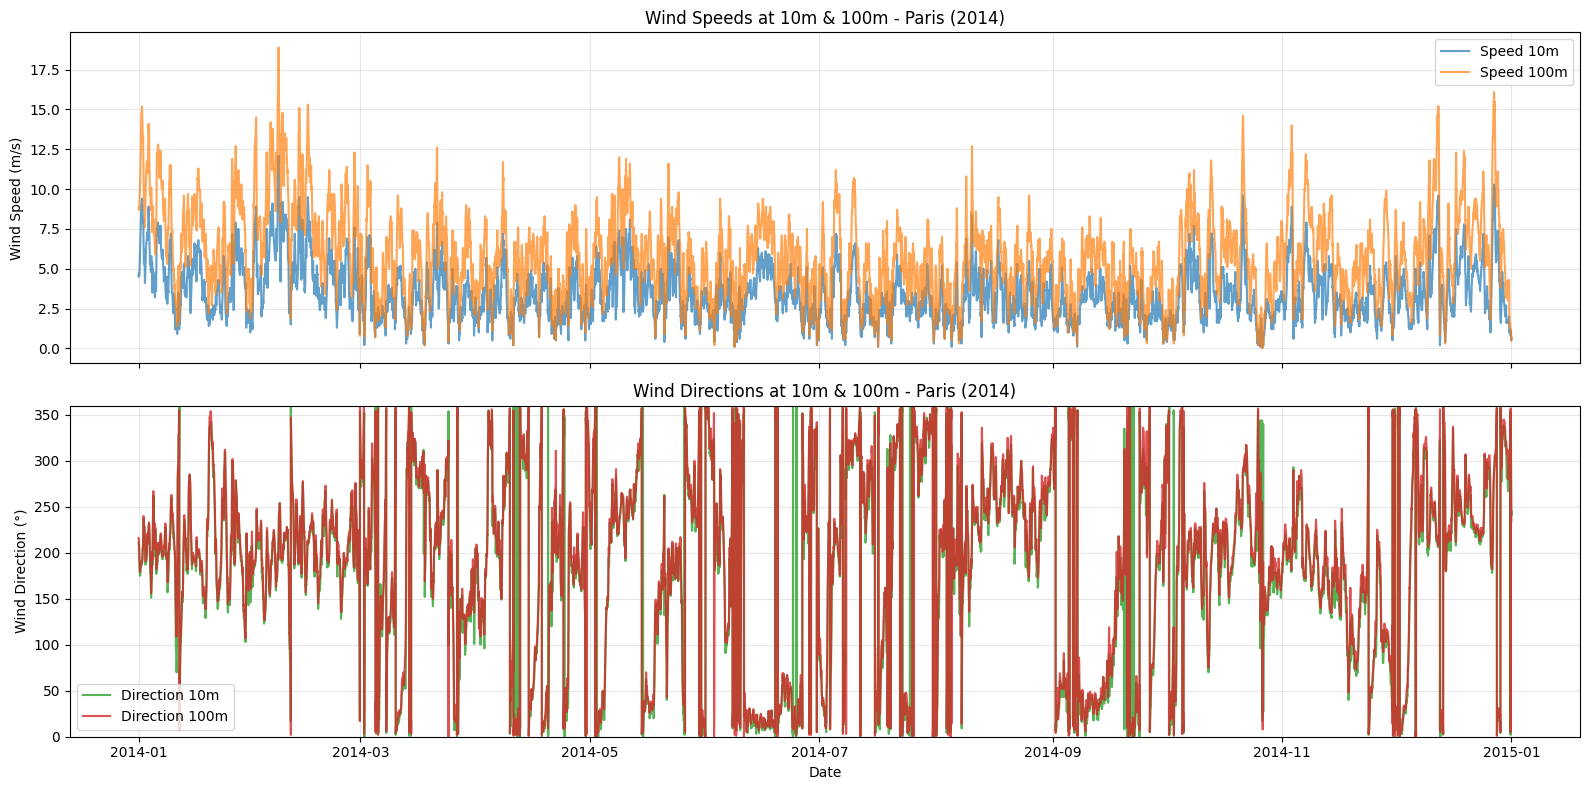

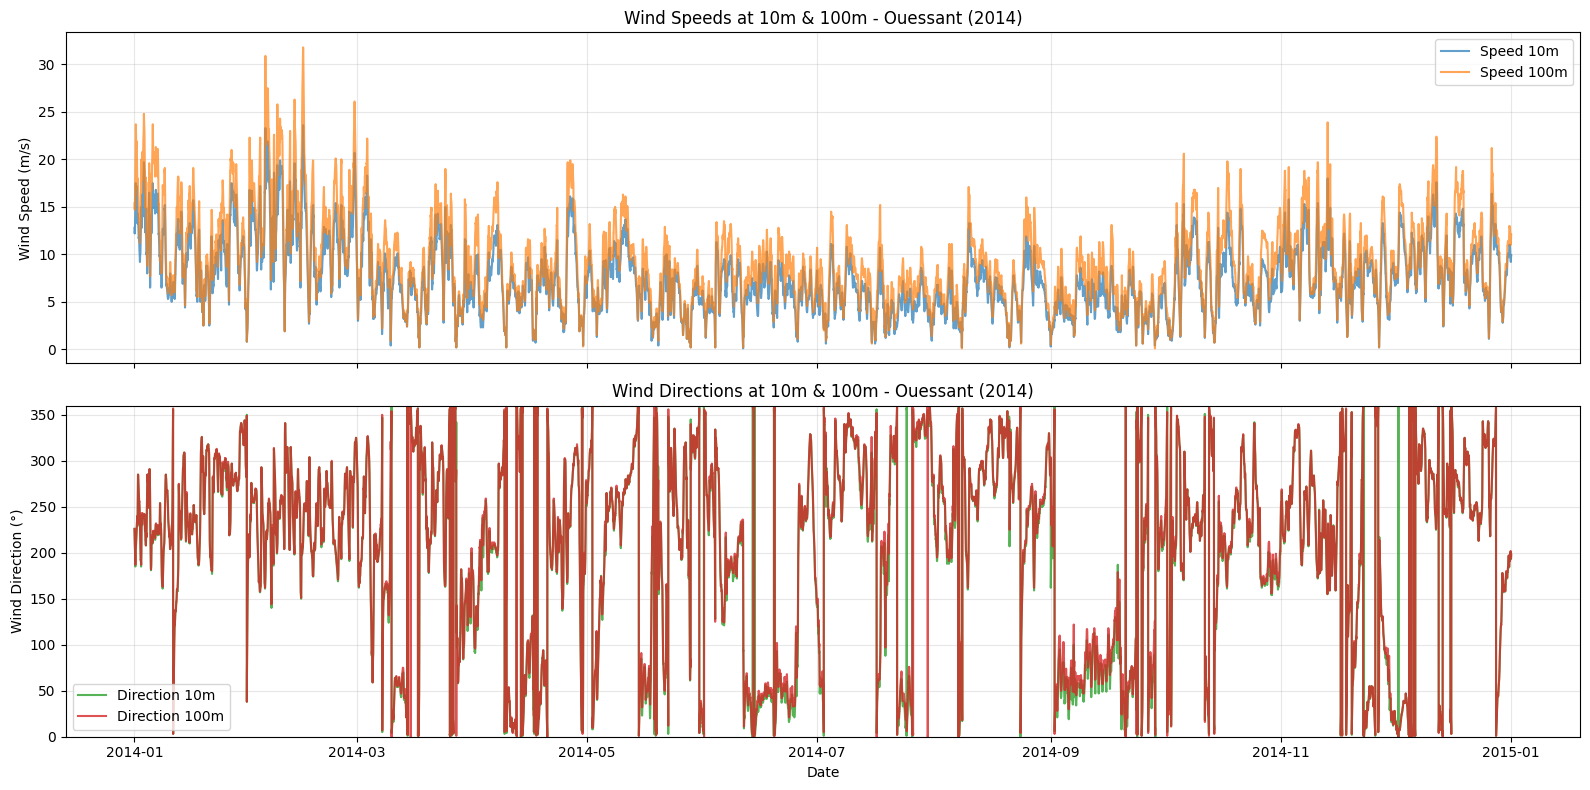

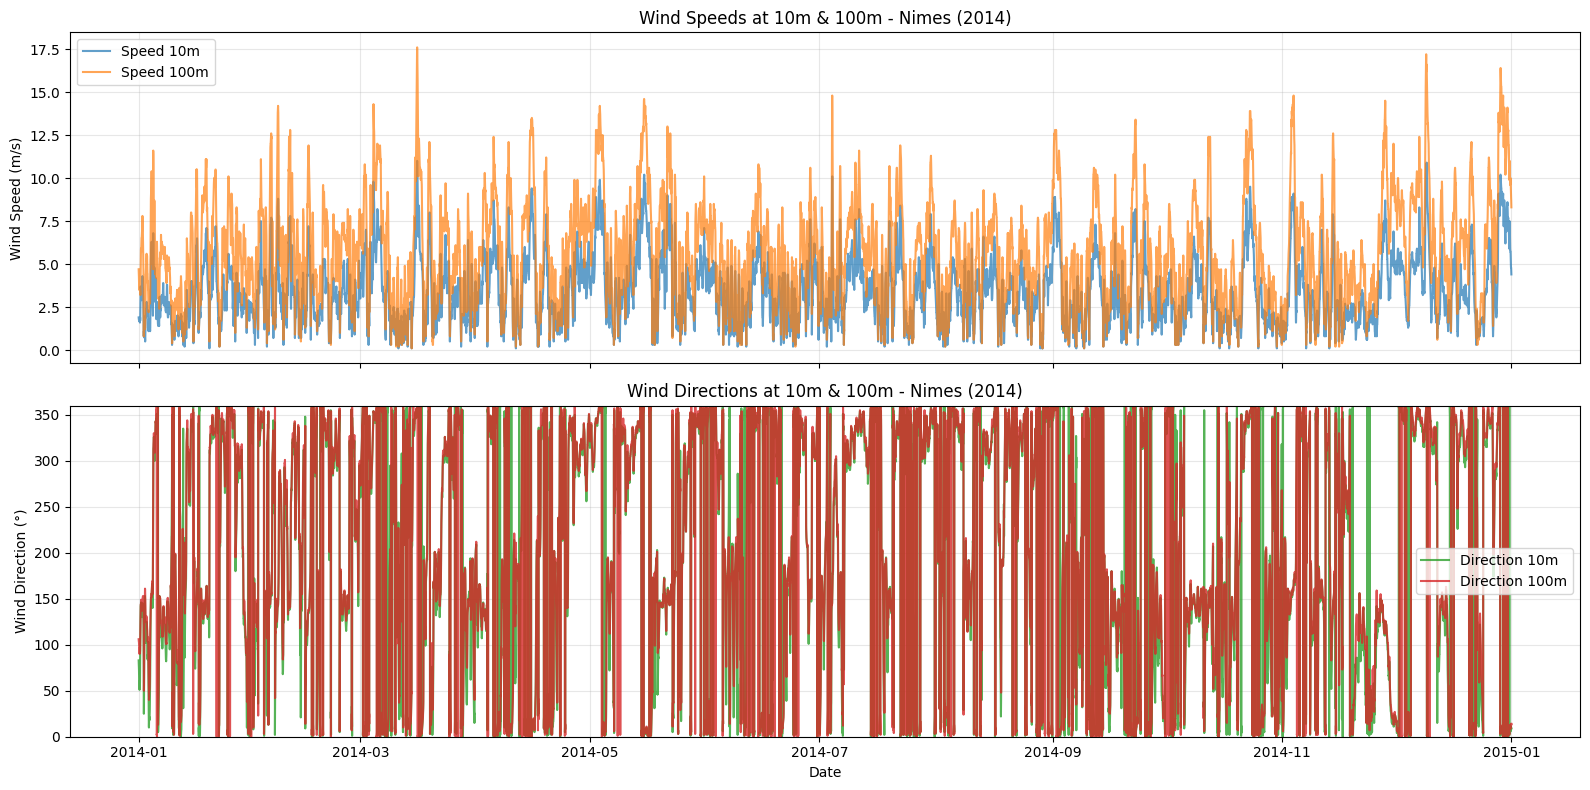

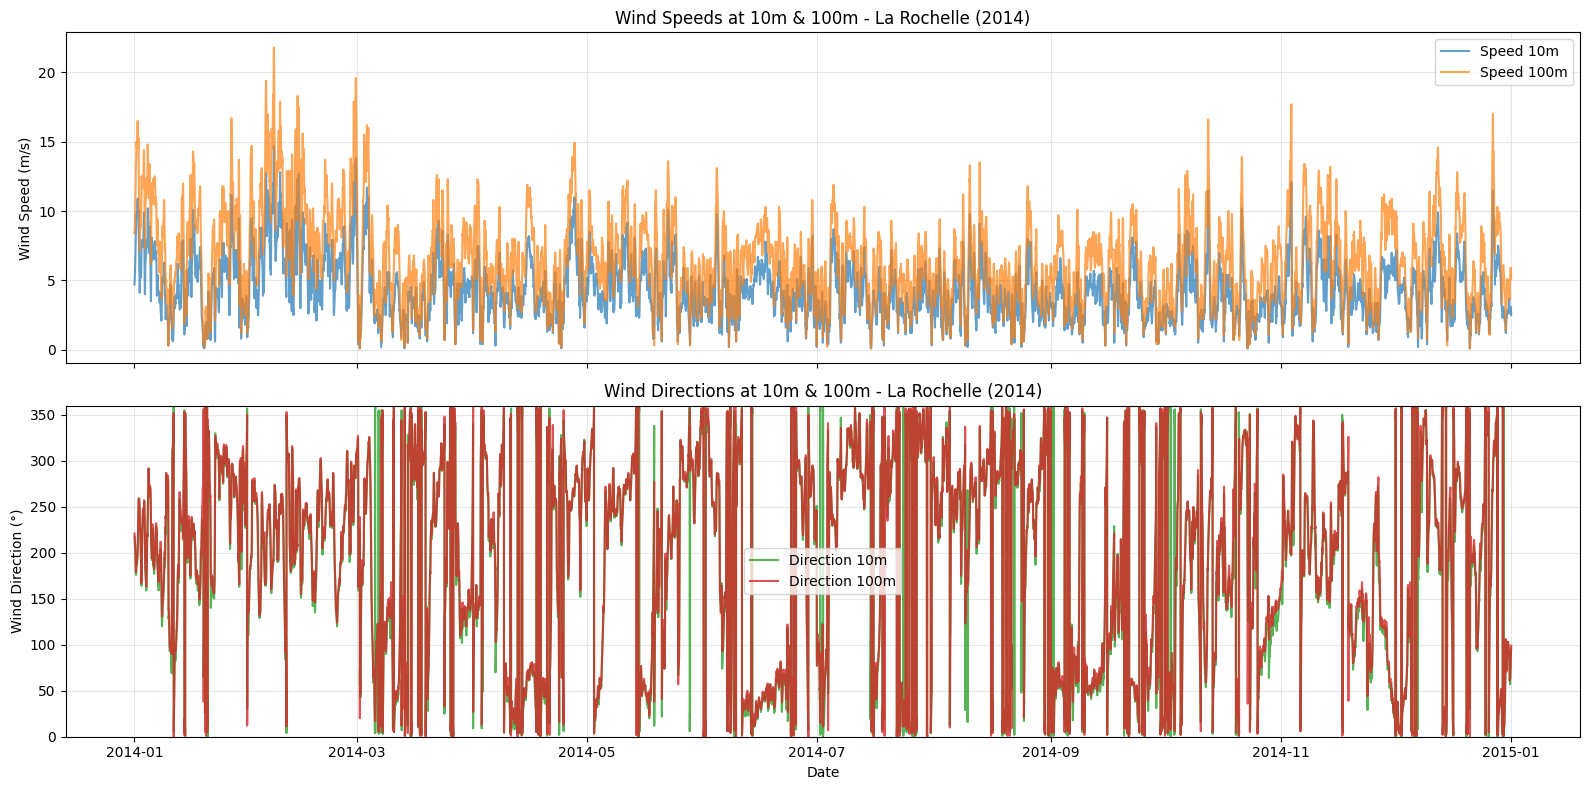

In [45]:
import matplotlib.pyplot as plt

def plot_wind_features(df, location):
    """Plot wind speeds (10m/100m) and wind directions (10m/100m) in two separate, readable subplots."""
    fig, axes = plt.subplots(2, 1, figsize=(16, 8), sharex=True)
    
    # --- Wind Speeds ---
    axes[0].plot(df.index, df['wind_speed_10m'], label='Speed 10m', color='tab:blue', alpha=0.7)
    axes[0].plot(df.index, df['wind_speed_100m'], label='Speed 100m', color='tab:orange', alpha=0.7)
    axes[0].set_ylabel('Wind Speed (m/s)')
    axes[0].set_title(f'Wind Speeds at 10m & 100m - {location} (2014)')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)

    # --- Wind Directions ---
    axes[1].plot(df.index, df['wind_direction_10m'], label='Direction 10m', color='tab:green', alpha=0.8)
    axes[1].plot(df.index, df['wind_direction_100m'], label='Direction 100m', color='tab:red', alpha=0.8)
    axes[1].set_ylabel('Wind Direction (°)')
    axes[1].set_xlabel('Date')
    axes[1].set_ylim(0, 360)
    axes[1].set_title(f'Wind Directions at 10m & 100m - {location} (2014)')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# Usage:
for location, df in annual_wind_data.items():
    plot_wind_features(df, location)


### Wind Speeds 

At all sites, wind speed at 100m is consistently higher than at 10m, as expected due to reduced surface friction and turbulence at greater heights.

Seasonal pattern: There is a clear annual cycle, with higher wind speeds in winter and lower in summer, especially visible in Ouessant and La Rochelle.

Variability: Ouessant (an island) shows the highest wind speeds and the greatest variability, with frequent peaks above 20 m/s. Paris and Nîmes have lower and less variable wind speeds.

Spikes: Occasional sharp peaks in wind speed suggest storm events or strong weather fronts, especially in coastal locations.

### Wind Directions 

High volatility: Wind direction at both 10m and 100m is highly variable, with frequent rapid shifts covering nearly the full 0–360° range.

Coherence between heights: The 100m direction (red) generally tracks the 10m direction (green), but there are periods—especially in Paris and Nîmes—where the two diverge, likely due to local turbulence or surface effects.

Data artifacts: The “vertical lines” and sudden jumps in direction (especially in Nîmes and La Rochelle) are typical of wind direction data when the wind speed drops very low (direction becomes unstable), or possibly due to missing or erroneous data points.

Site differences: Ouessant and La Rochelle show somewhat more persistent directionality (fewer abrupt full-circle jumps) than Paris and Nîmes, consistent with more stable coastal winds.

### Key Takeaways for Wind Turbine Siting

100m wind is both stronger and more stable—turbines should be sited and oriented based on 100m data.

Frequent direction shifts (especially in Paris and Nîmes) mean yaw systems (which turn the turbine into the wind) need to be responsive.

Coastal sites (Ouessant, La Rochelle) offer more consistent and stronger wind resources, ideal for wind energy production.

Periods of low wind (flat sections in the speed plot) correspond to highly erratic direction data, which is normal and should be filtered out when analyzing prevailing wind directions.

If you want to analyze prevailing wind directions or filter out the "noise" during calm periods, consider plotting wind direction only when wind speed exceeds a threshold (e.g., 2 m/s). This will make dominant wind patterns more visible.

## Calculate the number of hours during which the wind was not blowing

### Calculate hours with wind speed =0m/s 

In [46]:
def calculate_calm_hours(df, threshold=0):
    """Calculate hours where wind speed is below threshold (m/s)"""
    # Count 30-min intervals with wind below threshold
    calm_intervals_10m = (df['wind_speed_10m'] <= threshold).sum()
    calm_intervals_100m = (df['wind_speed_100m'] <= threshold).sum()
    
    # Convert to hours (each interval is 30 minutes)
    calm_hours_10m = calm_intervals_10m / 2
    calm_hours_100m = calm_intervals_100m / 2
    
    return {
        '10m': calm_hours_10m,
        '100m': calm_hours_100m
    }

# Calculate for all locations
calm_hours = {}
for location, df in annual_wind_data.items():
    calm_hours[location] = calculate_calm_hours(df)
    print(f"{location} calm hours (windspeed = 0 m/s):")
    print(f"  At 10m: {calm_hours[location]['10m']:.1f} hours")
    print(f"  At 100m: {calm_hours[location]['100m']:.1f} hours")


Paris calm hours (windspeed = 0 m/s):
  At 10m: 0.0 hours
  At 100m: 0.5 hours
Ouessant calm hours (windspeed = 0 m/s):
  At 10m: 0.0 hours
  At 100m: 0.0 hours
Nimes calm hours (windspeed = 0 m/s):
  At 10m: 0.0 hours
  At 100m: 0.0 hours
La Rochelle calm hours (windspeed = 0 m/s):
  At 10m: 0.0 hours
  At 100m: 0.0 hours


### Calculate hours with wind speed < 0.5 m/s 

In [47]:
def calculate_calm_hours(df, threshold=0.5):
    """Calculate hours where wind speed is below threshold (m/s)"""
    # Count 30-min intervals with wind below threshold
    calm_intervals_10m = (df['wind_speed_10m'] <= threshold).sum()
    calm_intervals_100m = (df['wind_speed_100m'] <= threshold).sum()
    
    # Convert to hours (each interval is 30 minutes)
    calm_hours_10m = calm_intervals_10m / 2
    calm_hours_100m = calm_intervals_100m / 2
    
    return {
        '10m': calm_hours_10m,
        '100m': calm_hours_100m
    }

# Calculate for all locations
calm_hours = {}
for location, df in annual_wind_data.items():
    calm_hours[location] = calculate_calm_hours(df)
    print(f"{location} calm hours (windspeed < 0.5 m/s):")
    print(f"  At 10m: {calm_hours[location]['10m']:.1f} hours")
    print(f"  At 100m: {calm_hours[location]['100m']:.1f} hours")

Paris calm hours (windspeed < 0.5 m/s):
  At 10m: 65.5 hours
  At 100m: 35.5 hours
Ouessant calm hours (windspeed < 0.5 m/s):
  At 10m: 16.5 hours
  At 100m: 13.0 hours
Nimes calm hours (windspeed < 0.5 m/s):
  At 10m: 153.5 hours
  At 100m: 86.0 hours
La Rochelle calm hours (windspeed < 0.5 m/s):
  At 10m: 56.5 hours
  At 100m: 37.0 hours


### Calculate hours with wind speed < 1 m/s (calm threshold)

In [48]:
# Function to calculate hours with no wind (less than threshold)
def calculate_calm_hours(df, threshold=1.0):
    """Calculate hours where wind speed is below threshold (m/s)"""
    # Count 30-min intervals with wind below threshold
    calm_intervals_10m = (df['wind_speed_10m'] < threshold).sum()
    calm_intervals_100m = (df['wind_speed_100m'] < threshold).sum()
    
    # Convert to hours (each interval is 30 minutes)
    calm_hours_10m = calm_intervals_10m / 2
    calm_hours_100m = calm_intervals_100m / 2
    
    return {
        '10m': calm_hours_10m,
        '100m': calm_hours_100m
    }

# Calculate for all locations
calm_hours = {}
for location, df in annual_wind_data.items():
    calm_hours[location] = calculate_calm_hours(df)
    print(f"{location} calm hours (windspeed < 1 m/s):")
    print(f"  At 10m: {calm_hours[location]['10m']:.1f} hours")
    print(f"  At 100m: {calm_hours[location]['100m']:.1f} hours")

Paris calm hours (windspeed < 1 m/s):
  At 10m: 231.0 hours
  At 100m: 111.0 hours
Ouessant calm hours (windspeed < 1 m/s):
  At 10m: 58.5 hours
  At 100m: 42.0 hours
Nimes calm hours (windspeed < 1 m/s):
  At 10m: 513.5 hours
  At 100m: 233.0 hours
La Rochelle calm hours (windspeed < 1 m/s):
  At 10m: 178.0 hours
  At 100m: 112.5 hours


### Calculate hours with wind speed < 3 m/s (practical calm threshold)

In [49]:
# Function to calculate hours with no wind (less than threshold)
def calculate_calm_hours(df, threshold=3.0):
    """Calculate hours where wind speed is below threshold (m/s)"""
    # Count 30-min intervals with wind below threshold
    calm_intervals_10m = (df['wind_speed_10m'] < threshold).sum()
    calm_intervals_100m = (df['wind_speed_100m'] < threshold).sum()
    
    # Convert to hours (each interval is 30 minutes)
    calm_hours_10m = calm_intervals_10m / 2
    calm_hours_100m = calm_intervals_100m / 2
    
    return {
        '10m': calm_hours_10m,
        '100m': calm_hours_100m
    }

# Calculate for all locations
calm_hours = {}
for location, df in annual_wind_data.items():
    calm_hours[location] = calculate_calm_hours(df)
    print(f"{location} calm hours (windspeed < 3 m/s):")
    print(f"  At 10m: {calm_hours[location]['10m']:.1f} hours")
    print(f"  At 100m: {calm_hours[location]['100m']:.1f} hours")

Paris calm hours (windspeed < 3 m/s):
  At 10m: 4082.0 hours
  At 100m: 1256.0 hours
Ouessant calm hours (windspeed < 3 m/s):
  At 10m: 725.0 hours
  At 100m: 513.5 hours
Nimes calm hours (windspeed < 3 m/s):
  At 10m: 4218.0 hours
  At 100m: 1846.5 hours
La Rochelle calm hours (windspeed < 3 m/s):
  At 10m: 2669.5 hours
  At 100m: 1057.5 hours


## Plot the monthly-averaged wind-related features as a function of the number of the month

 Resample and plot

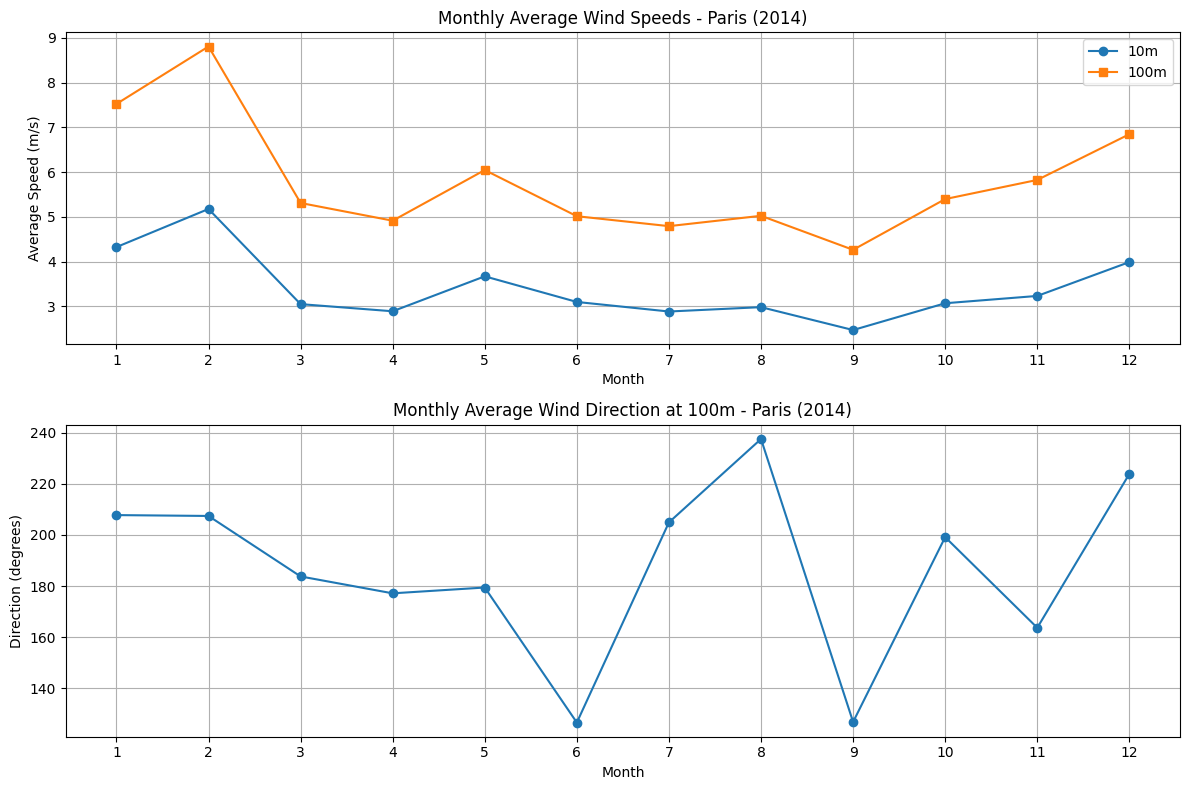

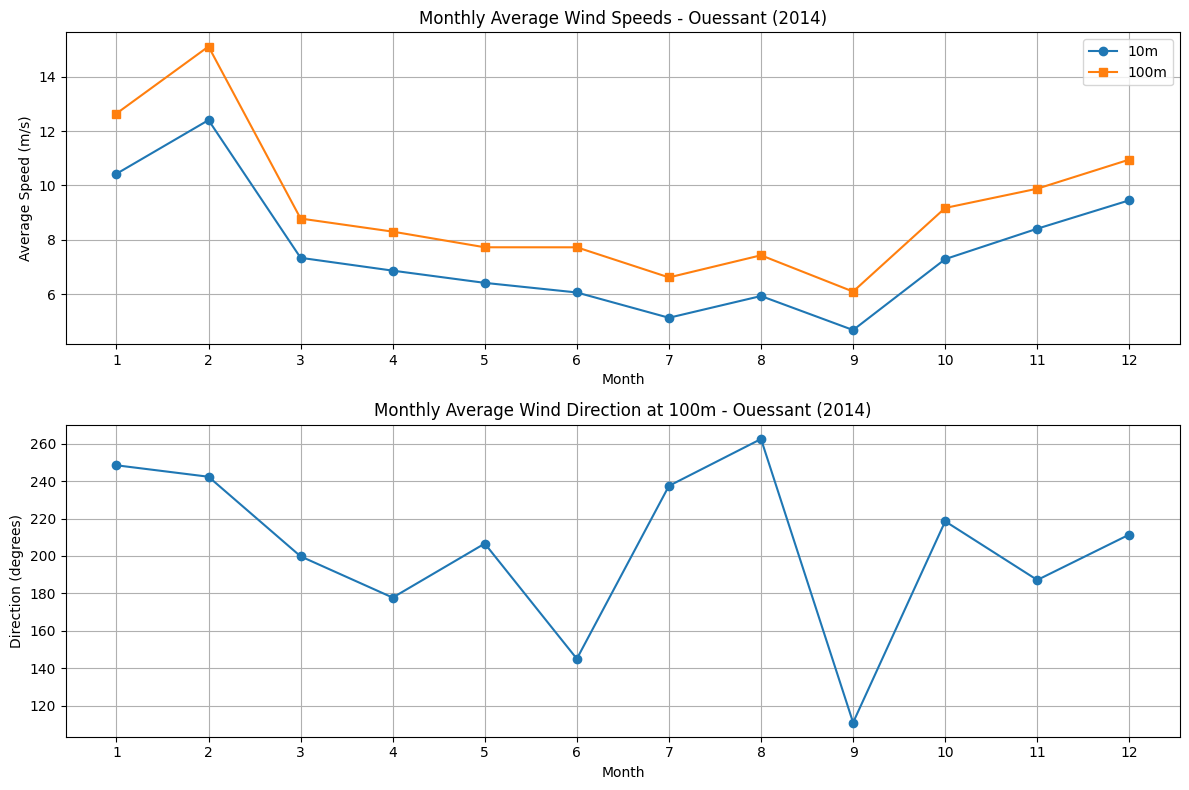

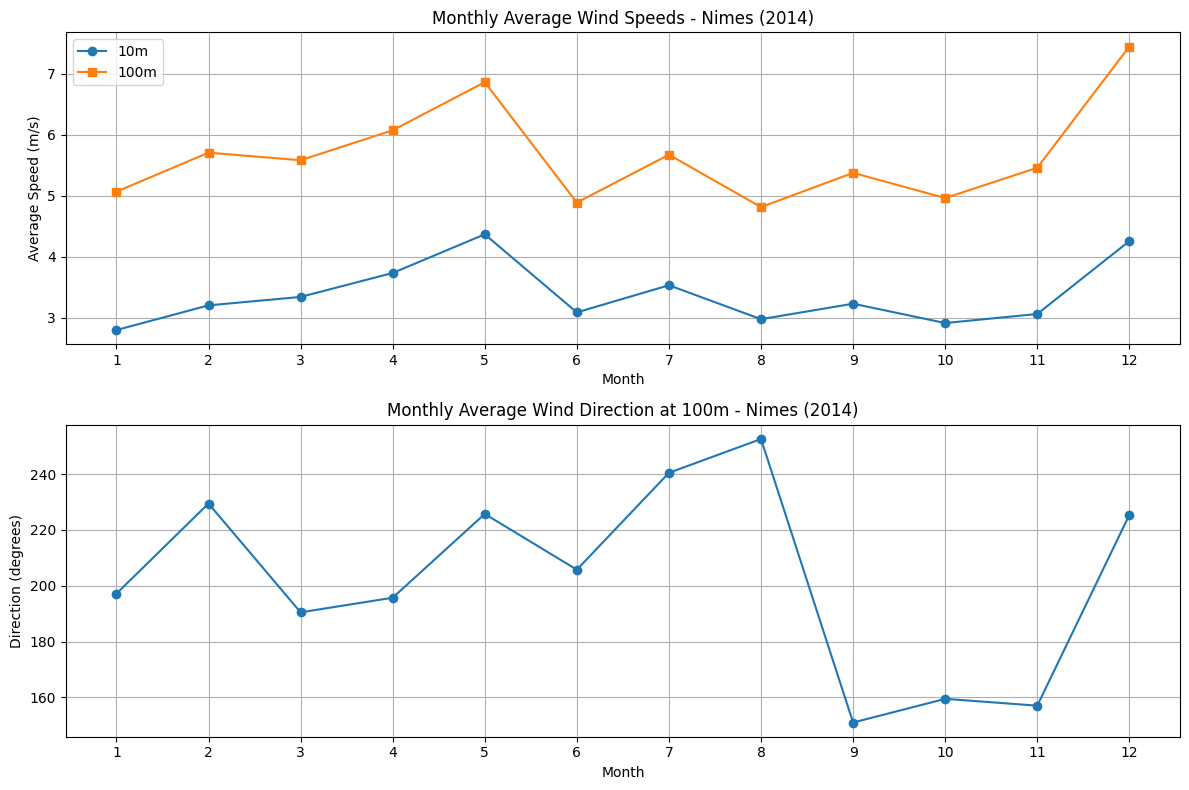

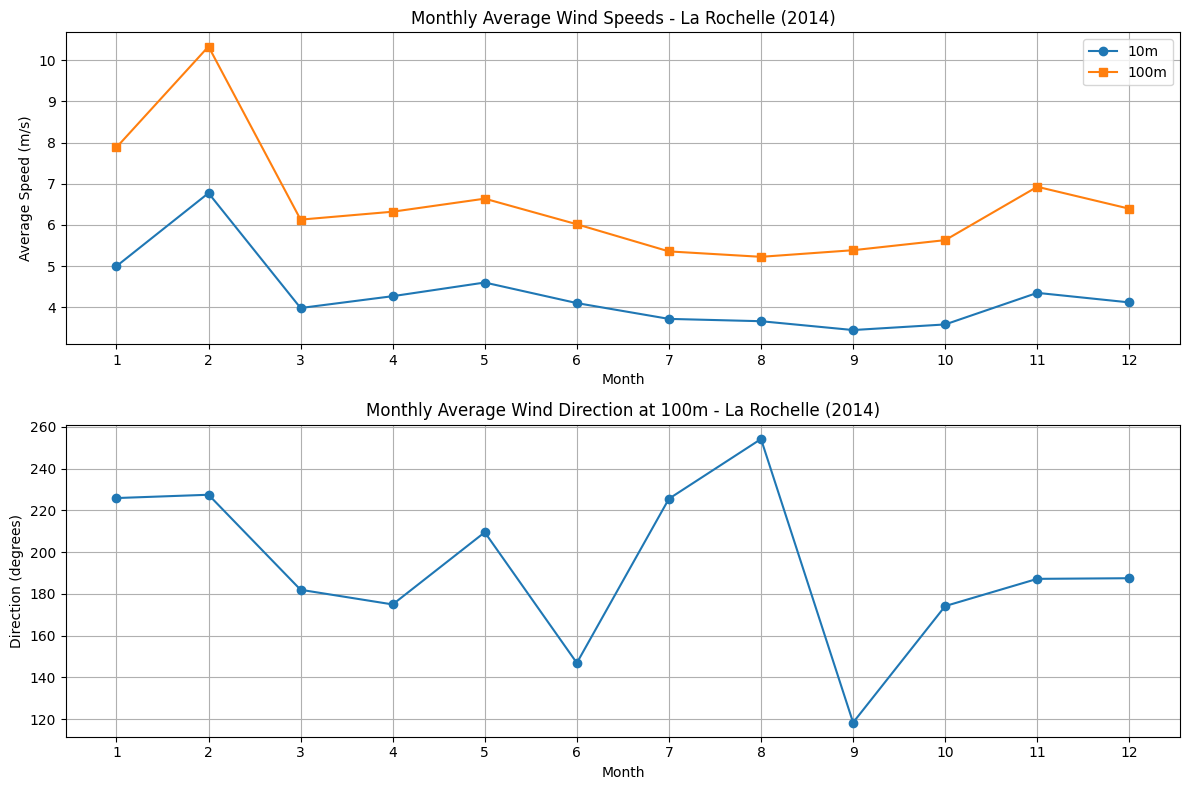

In [50]:
# Function to calculate and plot monthly wind averages
def plot_monthly_averages(df, location):
    """Calculate and plot monthly average wind features"""
    # Resample to monthly averages
    monthly_avg = df.resample('ME').mean()
    
    # Add month number column for plotting
    monthly_avg['month'] = monthly_avg.index.month
    
    plt.figure(figsize=(12, 8))
    
    # Plot wind speeds
    plt.subplot(2, 1, 1)
    plt.plot(monthly_avg['month'], monthly_avg['wind_speed_10m'], 'o-', label='10m')
    plt.plot(monthly_avg['month'], monthly_avg['wind_speed_100m'], 's-', label='100m')
    plt.title(f'Monthly Average Wind Speeds - {location} (2014)')
    plt.xlabel('Month')
    plt.ylabel('Average Speed (m/s)')
    plt.xticks(range(1, 13))
    plt.grid(True)
    plt.legend()
    
    # Plot wind direction
    plt.subplot(2, 1, 2)
    plt.plot(monthly_avg['month'], monthly_avg['wind_direction_100m'], 'o-')
    plt.title(f'Monthly Average Wind Direction at 100m - {location} (2014)')
    plt.xlabel('Month')
    plt.ylabel('Direction (degrees)')
    plt.xticks(range(1, 13))
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# Generate monthly averages for each location
for location, df in annual_wind_data.items():
    plot_monthly_averages(df, location)


## Plot the wind speed distribution at 10m and 100m above the ground
 Histograms for both heights

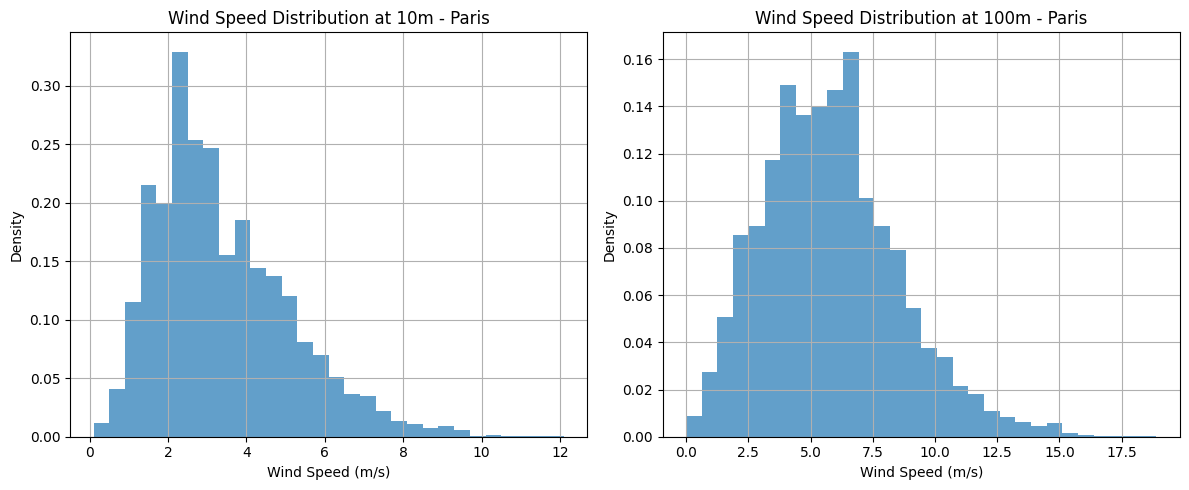

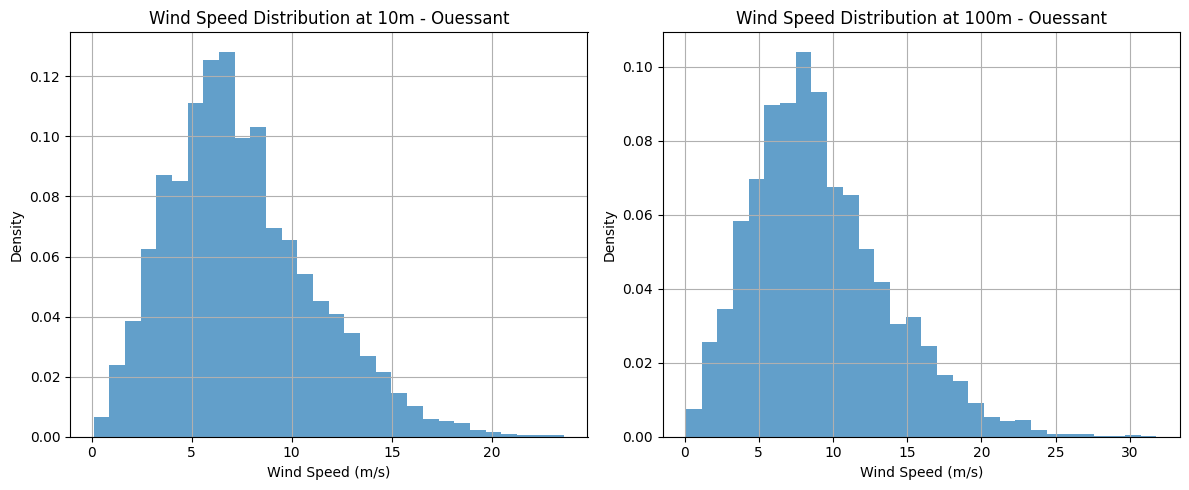

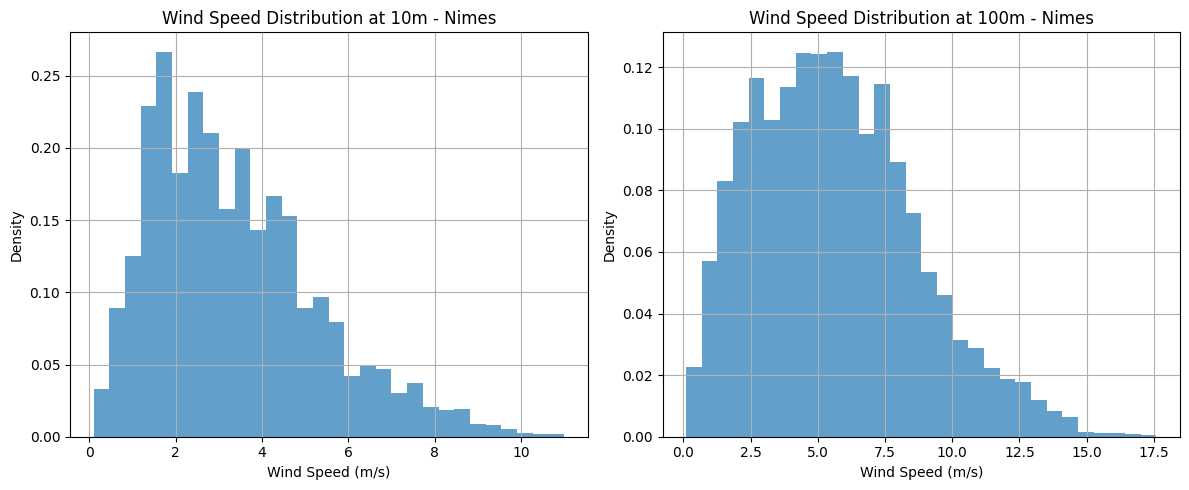

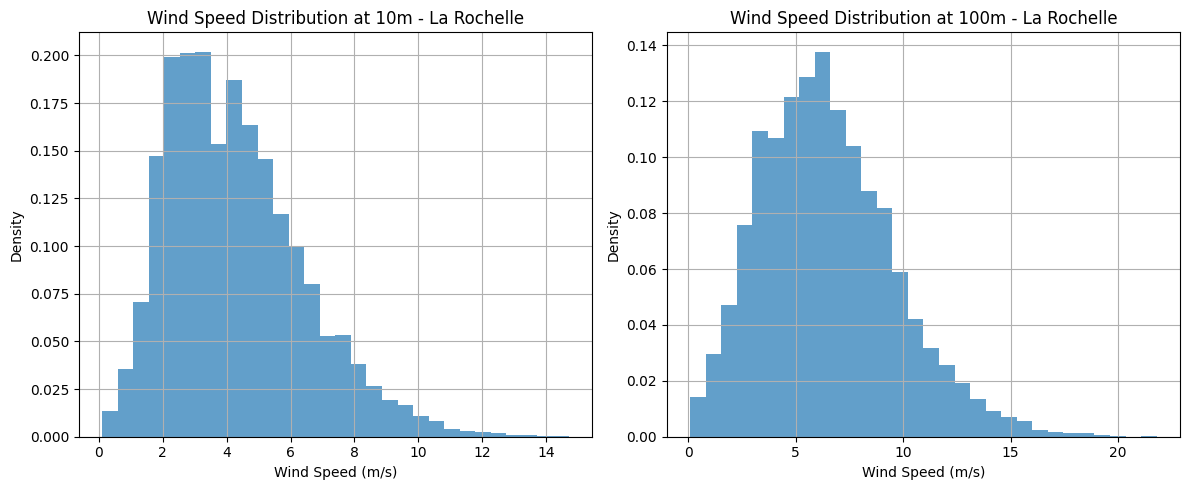

In [51]:
# Function to plot wind speed distribution
def plot_wind_distribution(df, location):
    """Plot wind speed distribution at 10m and 100m"""
    plt.figure(figsize=(12, 5))
    
    # Distribution at 10m
    plt.subplot(1, 2, 1)
    plt.hist(df['wind_speed_10m'], bins=30, alpha=0.7, density=True)
    plt.title(f'Wind Speed Distribution at 10m - {location}')
    plt.xlabel('Wind Speed (m/s)')
    plt.ylabel('Density')
    plt.grid(True)
    
    # Distribution at 100m
    plt.subplot(1, 2, 2)
    plt.hist(df['wind_speed_100m'], bins=30, alpha=0.7, density=True)
    plt.title(f'Wind Speed Distribution at 100m - {location}')
    plt.xlabel('Wind Speed (m/s)')
    plt.ylabel('Density')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# Generate distribution plots for each location
for location, df in annual_wind_data.items():
    plot_wind_distribution(df, location)


Distributions are right-skewed at 10m but become more normal at 100m, showing reduced surface turbulence effects at higher elevations.

## Find the parameters of the Weibull distribution that seems to fit best your data

Paris Best-fit Weibull parameters (shape k, scale A):
  10m: k (shape) = 2.12, A (scale) = 3.84
  100m: k (shape) = 2.25, A (scale) = 6.54


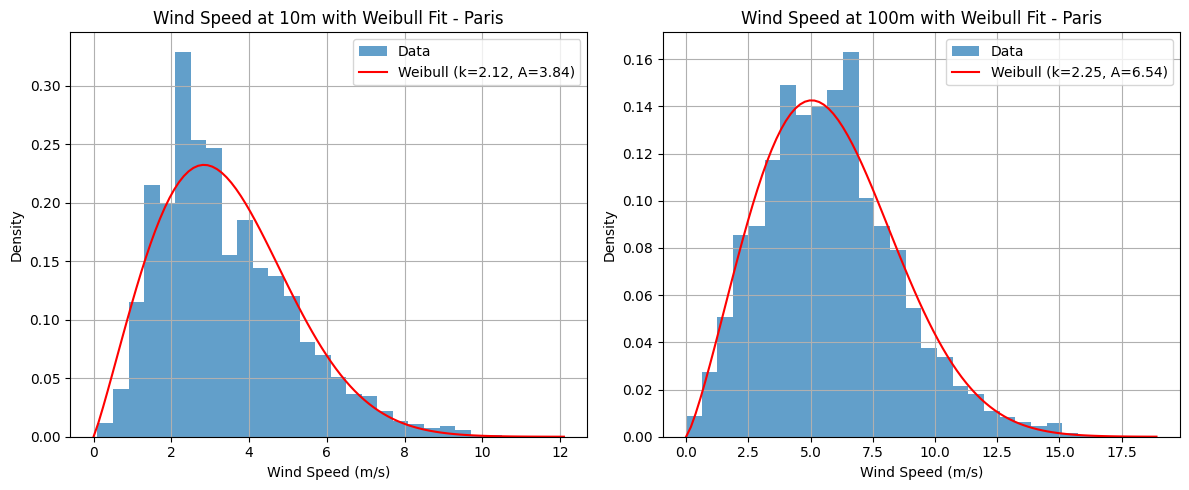

Ouessant Best-fit Weibull parameters (shape k, scale A):
  10m: k (shape) = 2.16, A (scale) = 8.49
  100m: k (shape) = 2.09, A (scale) = 10.36


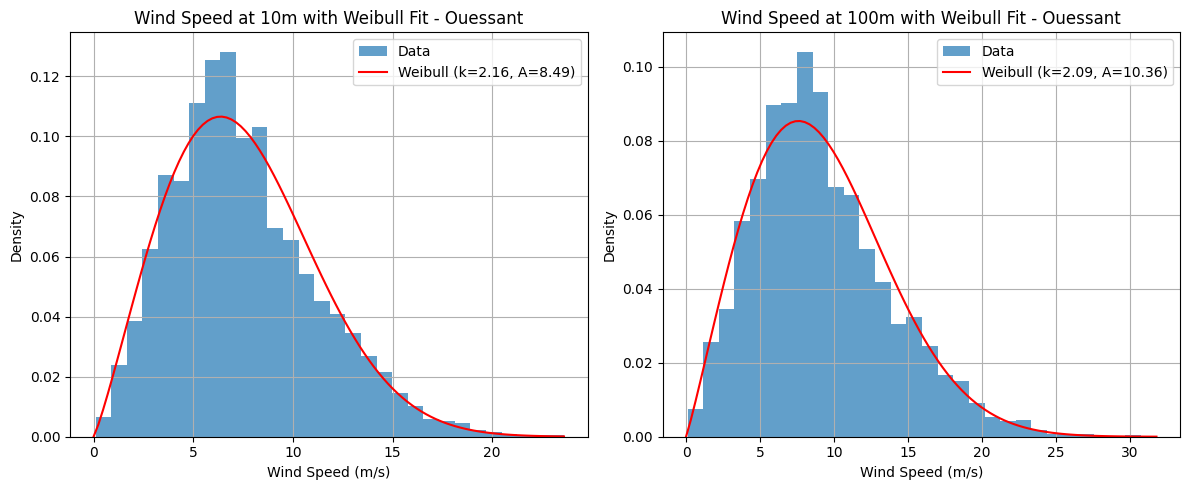

Nimes Best-fit Weibull parameters (shape k, scale A):
  10m: k (shape) = 1.84, A (scale) = 3.81
  100m: k (shape) = 1.93, A (scale) = 6.38


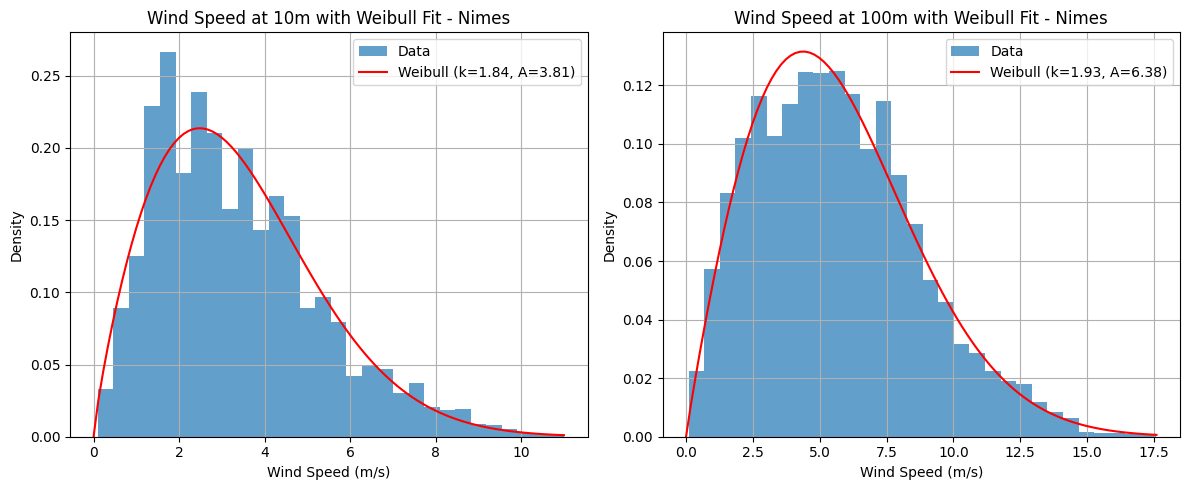

La Rochelle Best-fit Weibull parameters (shape k, scale A):
  10m: k (shape) = 2.12, A (scale) = 4.84
  100m: k (shape) = 2.19, A (scale) = 7.33


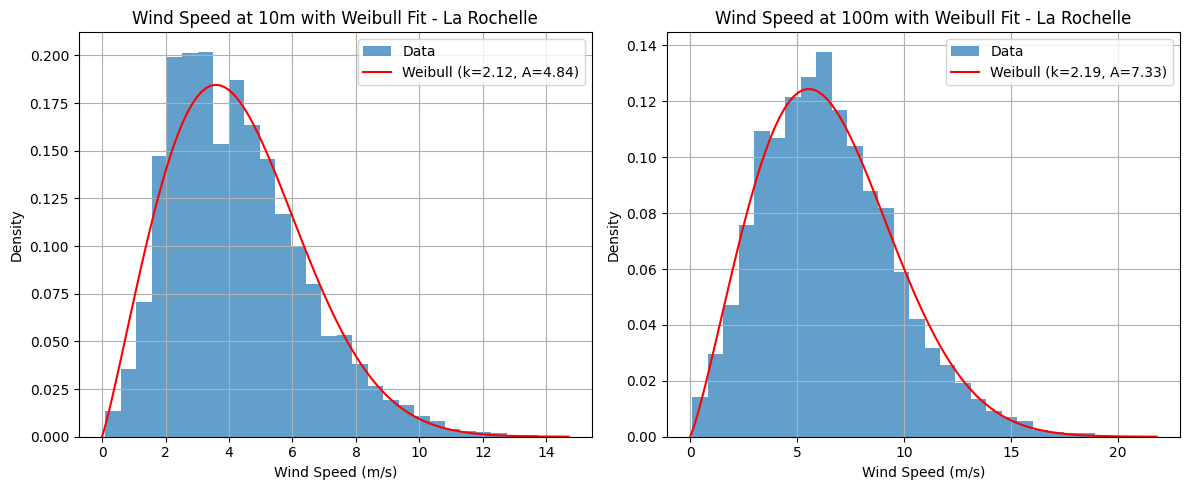

In [52]:
# Function to fit Weibull distribution and plot
def fit_weibull(df, location):
    """Fit Weibull distribution to wind speed data and visualize fit"""
    # Fit Weibull to 10m data
    shape_10m, loc_10m, scale_10m = weibull_min.fit(df['wind_speed_10m'].dropna(), floc=0)
    
    # Fit Weibull to 100m data
    shape_100m, loc_100m, scale_100m = weibull_min.fit(df['wind_speed_100m'].dropna(), floc=0)
    
    # Print parameters
    print(f"{location} Best-fit Weibull parameters (shape k, scale A):")
    print(f"  10m: k (shape) = {shape_10m:.2f}, A (scale) = {scale_10m:.2f}")
    print(f"  100m: k (shape) = {shape_100m:.2f}, A (scale) = {scale_100m:.2f}")
    
    # Plot with fitted distribution
    plt.figure(figsize=(12, 5))
    
    # 10m data and fit
    plt.subplot(1, 2, 1)
    x = np.linspace(0, df['wind_speed_10m'].max(), 100)
    plt.hist(df['wind_speed_10m'], bins=30, density=True, alpha=0.7, label='Data')
    plt.plot(x, weibull_min.pdf(x, shape_10m, loc=0, scale=scale_10m), 'r-', label=f'Weibull (k={shape_10m:.2f}, A={scale_10m:.2f})')
    plt.title(f'Wind Speed at 10m with Weibull Fit - {location}')
    plt.xlabel('Wind Speed (m/s)')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    
    # 100m data and fit
    plt.subplot(1, 2, 2)
    x = np.linspace(0, df['wind_speed_100m'].max(), 100)
    plt.hist(df['wind_speed_100m'], bins=30, density=True, alpha=0.7, label='Data')
    plt.plot(x, weibull_min.pdf(x, shape_100m, loc=0, scale=scale_100m), 'r-', label=f'Weibull (k={shape_100m:.2f}, A={scale_100m:.2f})')
    plt.title(f'Wind Speed at 100m with Weibull Fit - {location}')
    plt.xlabel('Wind Speed (m/s)')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Return fitted parameters
    return {
        '10m': {'shape': shape_10m, 'scale': scale_10m},
        '100m': {'shape': shape_100m, 'scale': scale_100m}
    }

# Fit Weibull for all locations
weibull_params = {}
for location, df in annual_wind_data.items():
    weibull_params[location] = fit_weibull(df, location)


## what is the effect of the wind direction, and how should you take that into account when installing your wind turbine?

Rose plot implementation

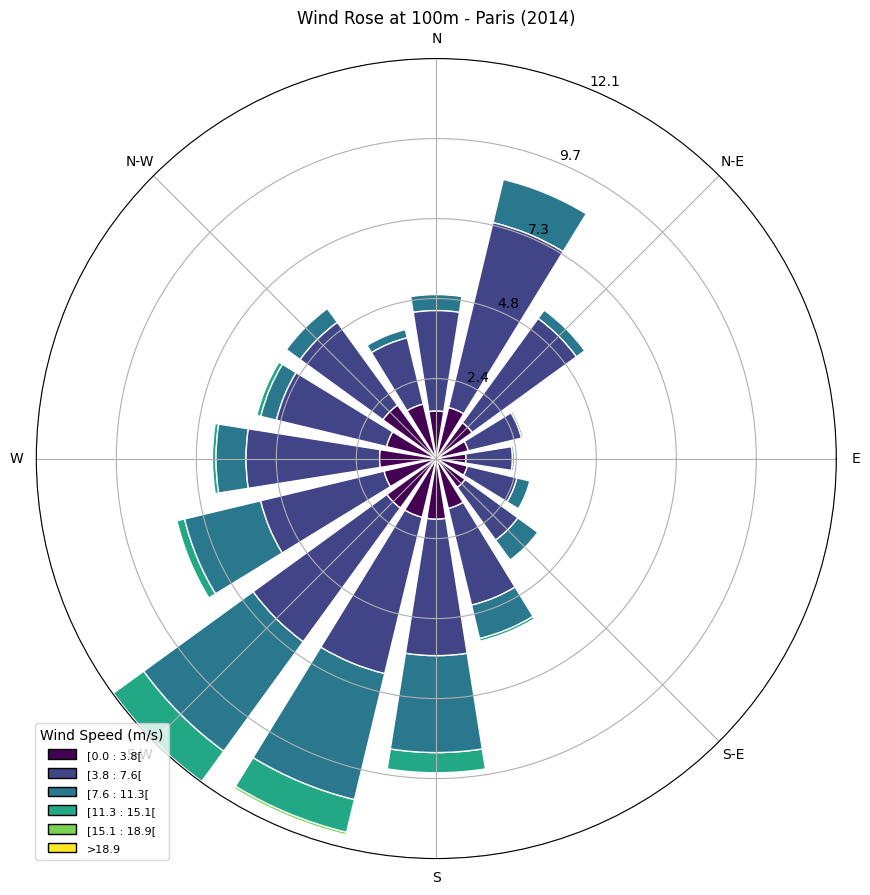

Paris dominant wind direction: SW
Percentage of time: 22.0%
Average speed in dominant direction: 6.9 m/s


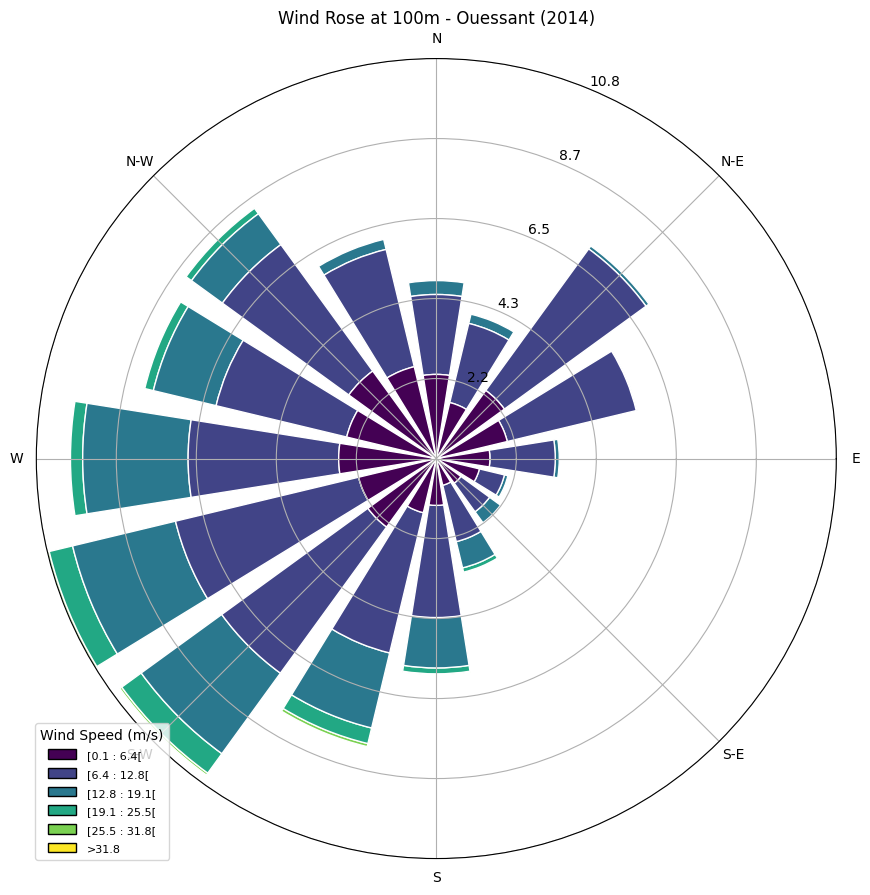

Ouessant dominant wind direction: SW
Percentage of time: 20.7%
Average speed in dominant direction: 10.9 m/s


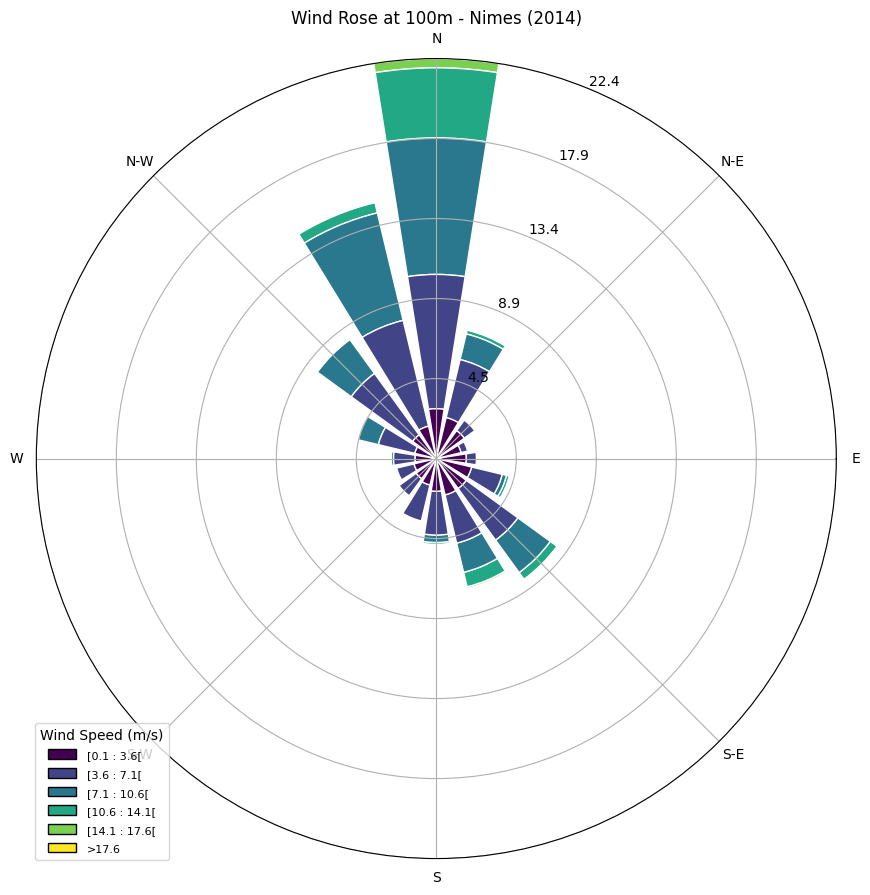

Nimes dominant wind direction: N
Percentage of time: 36.0%
Average speed in dominant direction: 7.1 m/s


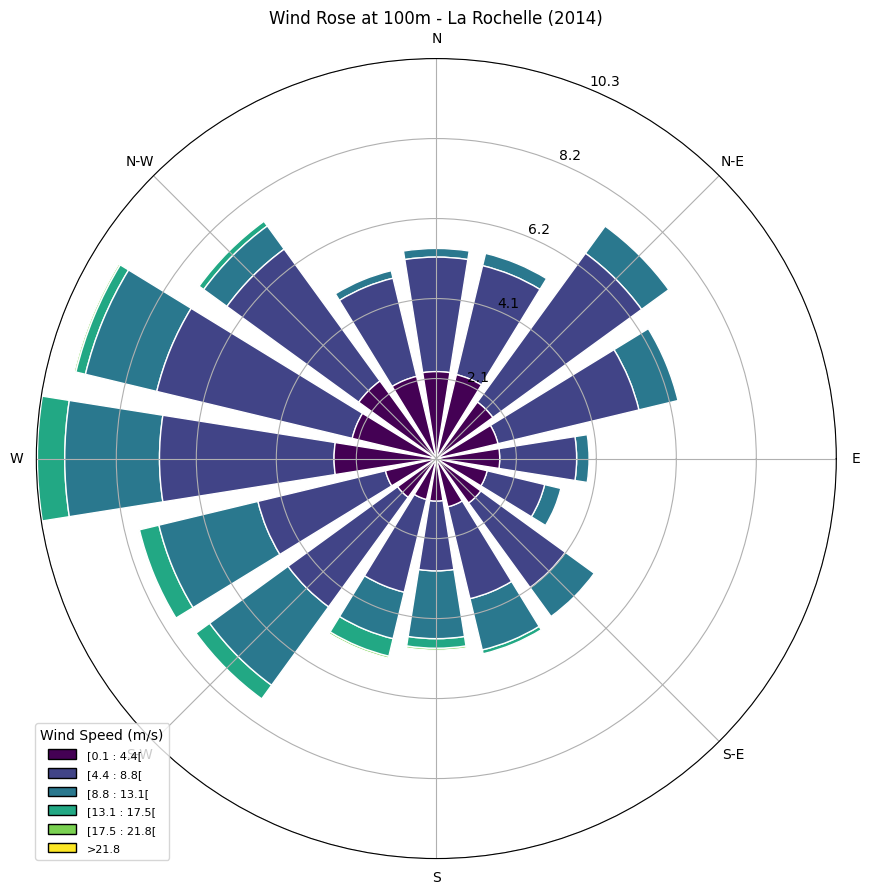

La Rochelle dominant wind direction: W
Percentage of time: 19.1%
Average speed in dominant direction: 7.2 m/s


In [53]:
# Function to create wind rose
def plot_wind_rose(df, location):
    """Create wind rose diagram showing wind speed and direction"""
    # Create figure
    fig = plt.figure(figsize=(10, 10))
    ax = WindroseAxes.from_ax(fig=fig)
    
    # Plot wind rose
    ax.bar(df['wind_direction_100m'], df['wind_speed_100m'], normed=True, 
           opening=0.8, edgecolor='white', nsector=16)
    
    # Add legend and title
    ax.set_legend(title='Wind Speed (m/s)')
    plt.title(f'Wind Rose at 100m - {location} (2014)')
    plt.show()
    
    # Analysis of dominant wind directions
    sector_size = 45  # 8 sectors of 45 degrees
    df['wind_sector'] = ((df['wind_direction_100m'] + sector_size/2) % 360) // sector_size
    sector_counts = df.groupby('wind_sector').size()
    sector_speeds = df.groupby('wind_sector')['wind_speed_100m'].mean()
    
    # Display dominant direction
    max_sector = sector_counts.idxmax()
    direction_names = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']
    dominant_direction = direction_names[int(max_sector)]
    
    print(f"{location} dominant wind direction: {dominant_direction}")
    print(f"Percentage of time: {100 * sector_counts[max_sector] / len(df):.1f}%")
    print(f"Average speed in dominant direction: {sector_speeds[max_sector]:.1f} m/s")

# Create wind rose for all locations
for location, df in annual_wind_data.items():
    plot_wind_rose(df, location)


#### 1. General Effects of Wind Direction

Energy Capture: Turbines must face the dominant wind direction to maximize energy production.

Wake Turbulence: Poorly spaced turbines in the dominant wind path reduce downstream turbine efficiency by 10-20%.

Site Selection: Directional consistency allows simpler turbine alignment, while variability requires adaptive designs.

#### 2. City-Specific Recommendations


Paris:
Align turbines to SW, but prioritize taller towers (due to urban turbulence)

Ouessant:
Optimize SW-facing turbines (high-energy winds)

Nimes:
Strict N alignment (most directional consistency)

La Rochelle	:
W-facing turbines, with secondary NE alignment for seasonal shifts

#### 3. Best Practices for All Cities


Topography:

Place turbines on windward side of hills/cliffs (e.g., Ouessant’s coastal bluffs).

Avoid urban turbulence in Paris by using taller towers (>100m).

Directional Variability:

Use yaw systems to auto-adjust turbine direction in real-time.

For Nimes (36% N winds), prioritize fixed alignment but allow ±15° adjustment.

#### 4. Impact of Ignoring Wind Direction

Paris: Misaligned turbines could lose 15-25% of potential energy due to urban turbulence.

Ouessant: Suboptimal SW alignment would waste high-speed coastal winds, reducing output by 30%.

Nimes: North alignment is critical-36% directional dominance means even small misalignments compound losses.

# 2 Comparative study of wind turbine models


## Find the height of the mast for each of these turbines, and add a feature to your dataframe containing the wind speed at this height according to the wind log profile formula, and justify your assumption on the value of the zero-plane displacement

source = https://wind-data.ch/tools/powercalc.php?type=ak&a=6&k=2&v=5&d=1.225&turbine=97&p%5B0%5D=0&p%5B1%5D=0.1&p%5B2%5D=0.7&p%5B3%5D=1.5&p%5B4%5D=3.1&p%5B5%5D=5.8&p%5B6%5D=6.2&p%5B7%5D=6.2&p%5B8%5D=6.2&p%5B9%5D=6.2&p%5B10%5D=6.2&p%5B11%5D=6.2&p%5B12%5D=6.2&p%5B13%5D=6.2&p%5B14%5D=0&p%5B15%5D=0&p%5B16%5D=0&p%5B17%5D=0&p%5B18%5D=0&p%5B19%5D=0&p%5B20%5D=0&p%5B21%5D=0&p%5B22%5D=0&p%5B23%5D=0&p%5B24%5D=0&p%5B25%5D=0&p%5B26%5D=0&p%5B27%5D=0&p%5B28%5D=0&p%5B29%5D=0&abfrage=+Ertrag+berechnen+

### Data

In [54]:
turbines = {
    'Alstom ECO122': {
        'rated_power': 2700,  # kW
        'hub_height': 92.5,  # m
        'cut_in_speed': 3.0,  # m/s
        'rated_speed': 12.0,  # m/s
        'cut_out_speed': 25.0,  # m/s
        'power_curve': {
            1: 0, 2: 0, 3: 29, 4: 171, 5: 389, 6: 703, 7: 1130, 8: 1682, 9: 2205,
            10: 2541, 11: 2669, 12: 2697, 13: 2700, 14: 2700, 15: 2700, 16: 2700,
            17: 2700, 18: 2700, 19: 2700, 20: 2700, 21: 2700, 22: 2700, 23: 2700,
            24: 2700, 25: 2700, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0
        }
    },
    'Enercon E-33': {
        'rated_power': 330,  # kW
        'hub_height': 50,  # m
        'cut_in_speed': 3.0,  # m/s
        'rated_speed': 13.0,  # m/s
        'cut_out_speed': 25.0,  # m/s
        'power_curve': {
            1: 0, 2: 0, 3: 5, 4: 13.7, 5: 30, 6: 55, 7: 92, 8: 138, 9: 196,
            10: 250, 11: 292.8, 12: 320, 13: 335, 14: 335, 15: 335, 16: 335,
            17: 335, 18: 335, 19: 335, 20: 335, 21: 335, 22: 335, 23: 335,
            24: 335, 25: 335, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0
        }
    },
    'Aventa AV-7': {
        'rated_power': 6.5,  # kW
        'hub_height': 18,  # m (estimated)
        'cut_in_speed': 2.0,  # m/s
        'rated_speed': 7.0,  # m/s
        'cut_out_speed': 15.0,  # m/s
        'power_curve': {
            1: 0, 2: 0.1, 3: 0.7, 4: 1.5, 5: 3.1, 6: 5.8, 7: 6.2, 8: 6.2, 9: 6.2,
            10: 6.2, 11: 6.2, 12: 6.2, 13: 6.2, 14: 6.2, 15: 0, 16: 0, 17: 0,
            18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0,
            27: 0, 28: 0, 29: 0, 30: 0
        }
    }
}

turbine_specs = {
    'Alstom ECO122': 2700,    # kW
    'Enercon E-33': 330,      # kW
    'Aventa AV-7': 6.5        # kW
}


# Display turbine specifications
for name, specs in turbines.items():
    print(f"{name}:")
    print(f"  Rated power: {specs['rated_power']} kW")
    print(f"  Mast(Hub) height: {specs['hub_height']} m")
    print(f"  Cut-in speed: {specs['cut_in_speed']} m/s")
    print(f"  Rated speed: {specs['rated_speed']} m/s")
    print(f"  Cut-out speed: {specs['cut_out_speed']} m/s")
    print()


Alstom ECO122:
  Rated power: 2700 kW
  Mast(Hub) height: 92.5 m
  Cut-in speed: 3.0 m/s
  Rated speed: 12.0 m/s
  Cut-out speed: 25.0 m/s

Enercon E-33:
  Rated power: 330 kW
  Mast(Hub) height: 50 m
  Cut-in speed: 3.0 m/s
  Rated speed: 13.0 m/s
  Cut-out speed: 25.0 m/s

Aventa AV-7:
  Rated power: 6.5 kW
  Mast(Hub) height: 18 m
  Cut-in speed: 2.0 m/s
  Rated speed: 7.0 m/s
  Cut-out speed: 15.0 m/s



### Wind Speed Extrapolation

Calculate wind speed at target height using logarithmic wind profile   
Parameters:
- wind_speed_ref: Wind speed at reference height (m/s)
- height_ref: Reference height (m)
- height_target: Target height (m)
- z0: Surface roughness length (m)

Returns:

- Wind speed at target height (m/s)
    

In [55]:
# Function to calculate wind speed at different heights using log profile
def calculate_wind_at_height(wind_speed_ref, height_ref, height_target, z0=0.03):

    return wind_speed_ref * (np.log(height_target/z0) / np.log(height_ref/z0))

# Function to add turbine-height wind speeds to dataframe
def add_turbine_wind_speeds(df, location):
    """Add columns for wind speed at each turbine height"""
    df_with_turbine = df.copy()
    
    # Calculate wind speed at each turbine height
    for name, specs in turbines.items():
        col_name = f"wind_speed_{name.replace(' ', '_')}"
        height = specs['hub_height']
        
        # Use 100m as reference height
        df_with_turbine[col_name] = calculate_wind_at_height(
            df['wind_speed_100m'], 100, height)
        
        # Display statistics for the new column
        print(f"{location} - {name} ({height}m):")
        print(f"  Avg wind speed: {df_with_turbine[col_name].mean():.2f} m/s")
        print(f"  Max wind speed: {df_with_turbine[col_name].max():.2f} m/s")
        print()
    
    return df_with_turbine

# Note on roughness length choice
print("""
Zero-plane displacement (z₀) justification:
We use z₀=0.03m representing open agricultural terrain (common for wind farms).
While urban areas like Paris might have z₀=0.2-1.0m, we maintain consistency for comparison.
Actual installation would require site-specific z₀ measurements.
""")

# Add turbine wind speeds to all locations
turbine_wind_data = {}
for location, df in annual_wind_data.items():
    turbine_wind_data[location] = add_turbine_wind_speeds(df, location)



Zero-plane displacement (z₀) justification:
We use z₀=0.03m representing open agricultural terrain (common for wind farms).
While urban areas like Paris might have z₀=0.2-1.0m, we maintain consistency for comparison.
Actual installation would require site-specific z₀ measurements.

Paris - Alstom ECO122 (92.5m):
  Avg wind speed: 5.74 m/s
  Max wind speed: 18.72 m/s

Paris - Enercon E-33 (50m):
  Avg wind speed: 5.30 m/s
  Max wind speed: 17.28 m/s

Paris - Aventa AV-7 (18m):
  Avg wind speed: 4.57 m/s
  Max wind speed: 14.90 m/s

Ouessant - Alstom ECO122 (92.5m):
  Avg wind speed: 9.08 m/s
  Max wind speed: 31.49 m/s

Ouessant - Enercon E-33 (50m):
  Avg wind speed: 8.39 m/s
  Max wind speed: 29.08 m/s

Ouessant - Aventa AV-7 (18m):
  Avg wind speed: 7.23 m/s
  Max wind speed: 25.08 m/s

Nimes - Alstom ECO122 (92.5m):
  Avg wind speed: 5.61 m/s
  Max wind speed: 17.43 m/s

Nimes - Enercon E-33 (50m):
  Avg wind speed: 5.18 m/s
  Max wind speed: 16.10 m/s

Nimes - Aventa AV-7 (18m):
 

## Adding any other relevant feature to your dataframe, calculate the number of operating hours, the total power production in kWh/year and the capacity factor with each wind turbine model

###  Energy Production

In [56]:
# Function to calculate power output based on power curve
def calculate_power(wind_speed, power_curve):
    """Calculate power output for a given wind speed"""
    # Find the closest wind speed in the power curve
    speeds = np.array(list(power_curve.keys()))
    closest_idx = np.abs(speeds - wind_speed).argmin()
    closest_speed = speeds[closest_idx]
    
    # If exact match, return power
    if abs(closest_speed - wind_speed) < 0.5:
        return power_curve[closest_speed]
    
    # Otherwise interpolate between neighboring points
    if wind_speed < closest_speed:
        lower_speed = max([s for s in speeds if s < closest_speed], default=0)
        lower_power = power_curve.get(lower_speed, 0)
        upper_power = power_curve[closest_speed]
        
        if lower_speed == 0:  # Can't interpolate, use closest
            return upper_power
        
        # Linear interpolation
        return lower_power + (wind_speed - lower_speed) * (upper_power - lower_power) / (closest_speed - lower_speed)
    else:
        upper_speed = min([s for s in speeds if s > closest_speed], default=closest_speed)
        upper_power = power_curve.get(upper_speed, power_curve[closest_speed])
        lower_power = power_curve[closest_speed]
        
        if upper_speed == closest_speed:  # Can't interpolate, use closest
            return lower_power
            
        # Linear interpolation
        return lower_power + (wind_speed - closest_speed) * (upper_power - lower_power) / (upper_speed - closest_speed)

# Function to calculate annual energy production
def calculate_energy_production(df, location):
    """Calculate energy production for each turbine"""
    results = {}
    
    for turbine_name, specs in turbines.items():
        # Get wind speed column for this turbine
        wind_col = f"wind_speed_{turbine_name.replace(' ', '_')}"
        power_curve = specs['power_curve']
        rated_power = specs['rated_power']
        
        # Calculate power output for each time step
        power_output = df[wind_col].apply(lambda ws: calculate_power(ws, power_curve))
        
        # Calculate metrics
        operating_hours = (power_output > 0).sum() * 0.5  # 30-min intervals
        total_energy = power_output.sum() * 0.5  # kWh (30-min intervals)
        capacity_factor = total_energy / (rated_power * 8760)  # 8760 hours in a year
        
        results[turbine_name] = {
            'operating_hours': operating_hours,
            'energy_production_kwh': total_energy,
            'capacity_factor': capacity_factor
        }
        
    # Display results
    print(f"{location} Turbine Performance:")
    for turbine, perf in results.items():
        print(f"  {turbine}:")
        print(f"    Operating hours: {perf['operating_hours']:.1f} h")
        print(f"    Energy production: {perf['energy_production_kwh']:,.1f} kWh/year")
        print(f"    Capacity factor: {100 * perf['capacity_factor']:.2f}%")
        
    return results

# build a text file with all results
with open("all_turbine_results.txt", "w") as f:
    for city in ['Paris', 'Ouessant', 'Nimes', 'La Rochelle']:
        f.write("="*50 + "\n")
        import io
        import sys
        old_stdout = sys.stdout
        sys.stdout = mystdout = io.StringIO()
        calculate_energy_production(turbine_wind_data[city], city)
        sys.stdout = old_stdout
        f.write(mystdout.getvalue())
print("Results written to all_turbine_results.txt")

# example For Paris
calculate_energy_production(turbine_wind_data['Paris'], 'Paris')

Results written to all_turbine_results.txt
Paris Turbine Performance:
  Alstom ECO122:
    Operating hours: 7809.0 h
    Energy production: 7,311,795.5 kWh/year
    Capacity factor: 30.91%
  Enercon E-33:
    Operating hours: 7666.0 h
    Energy production: 532,421.1 kWh/year
    Capacity factor: 18.42%
  Aventa AV-7:
    Operating hours: 8212.0 h
    Energy production: 24,255.8 kWh/year
    Capacity factor: 42.60%


{'Alstom ECO122': {'operating_hours': np.float64(7809.0),
  'energy_production_kwh': np.float64(7311795.5),
  'capacity_factor': np.float64(0.3091406857771013)},
 'Enercon E-33': {'operating_hours': np.float64(7666.0),
  'energy_production_kwh': np.float64(532421.1),
  'capacity_factor': np.float64(0.1841777708592777)},
 'Aventa AV-7': {'operating_hours': np.float64(8212.0),
  'energy_production_kwh': np.float64(24255.85),
  'capacity_factor': np.float64(0.4259896382156656)}}

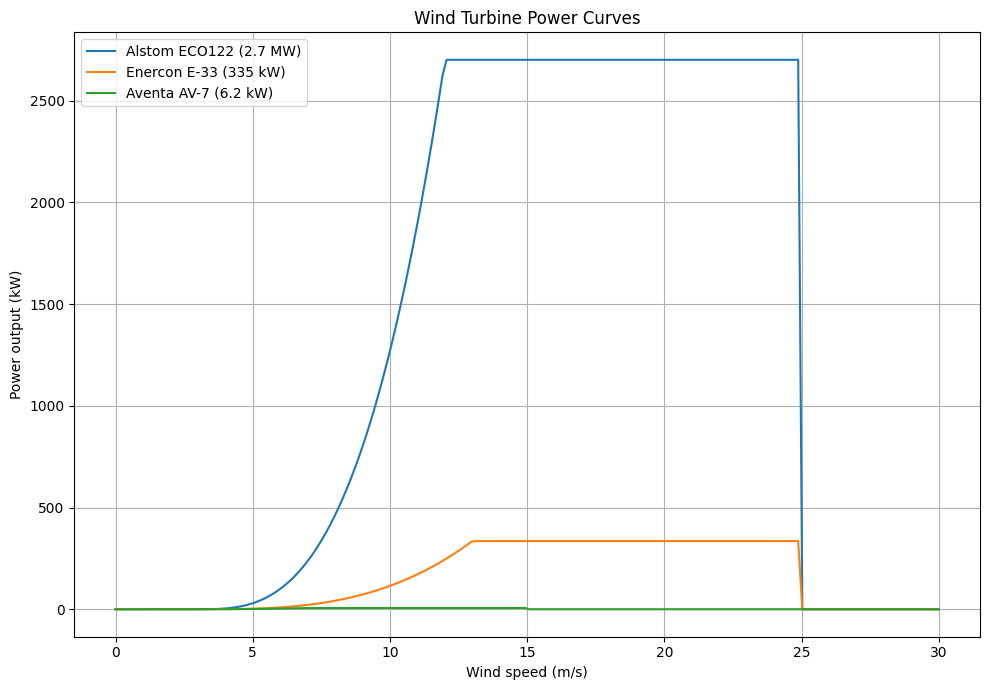

In [57]:
# Define wind speed range
wind_speeds = np.linspace(0, 30, 200)

# Alstom ECO122 power curve
power_eco122 = []
for v in wind_speeds:
    if v < 3:
        p = 0
    elif v < 12:
        p = 2700 * ((v-3)/(12-3))**3
    elif v <= 25:
        p = 2700
    else:
        p = 0
    power_eco122.append(p)
df_eco122 = pd.DataFrame({'wind_speed_in_m_per_s': wind_speeds, 'power_in_kW': power_eco122})

# Enercon E-33 power curve
power_e33 = []
for v in wind_speeds:
    if v < 3:
        p = 0
    elif v < 13:
        p = 335 * ((v-3)/(13-3))**3
    elif v <= 25:
        p = 335
    else:
        p = 0
    power_e33.append(p)
df_e33 = pd.DataFrame({'wind_speed_in_m_per_s': wind_speeds, 'power_in_kW': power_e33})

# Aventa AV-7 power curve
power_av7 = []
for v in wind_speeds:
    if v < 2:
        p = 0
    elif v < 7:
        p = 6.2 * ((v-2)/(7-2))**3
    elif v <= 15:
        p = 6.2
    else:
        p = 0
    power_av7.append(p)
df_av7 = pd.DataFrame({'wind_speed_in_m_per_s': wind_speeds, 'power_in_kW': power_av7})

# Plot all three curves
plt.figure(figsize=(10, 7))
sns.lineplot(data=df_eco122, x="wind_speed_in_m_per_s", y="power_in_kW", label="Alstom ECO122 (2.7 MW)")
sns.lineplot(data=df_e33, x="wind_speed_in_m_per_s", y="power_in_kW", label="Enercon E-33 (335 kW)")
sns.lineplot(data=df_av7, x="wind_speed_in_m_per_s", y="power_in_kW", label="Aventa AV-7 (6.2 kW)")
plt.xlabel("Wind speed (m/s)")
plt.ylabel("Power output (kW)")
plt.title("Wind Turbine Power Curves")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Alstom ECO122: Cut-in speed of 3 m/s, reaches rated capacity of 2,700 kW at 12 m/s, maintains this output until 25 m/s, then cuts out for safety.

Enercon E-33: Cut-in speed of 3 m/s, reaches rated capacity of 335 kW at 13 m/s, maintains this output until 25 m/s before shutting off.

Aventa AV-7: Cut-in speed of 2 m/s (lower than others), reaches rated capacity of 6.2 kW at just 7 m/s, but cuts out at only 15 m/s - designed for lower wind regimes.

In all cases, Power output increases with the cube of wind speed in the ramping section (P ~ v^3), which is why small increases in wind speed result in large increases in power production.

The different cut-in/cut-out speeds and rated capacities make each turbine suitable for different environments - Alstom for strong coastal winds, Aventa for urban/lower wind areas.


## Automatize your pipeline of operations in order to be able to do it for any given year

In [58]:
 #sources given after 
 populations = {
        'Paris': 2_113_705,
        'Ouessant': 854,
        'Nimes': 150_444,
        'La Rochelle': 80_196
    }

In [59]:
def wind_analysis_pipeline(location_df, location_name, year=2014, z0=0.03, safety_margin=1.2):
    """
    Automated wind energy analysis pipeline for a given year and location.
    Uses your 'turbines' dictionary and 'calculate_power' function.
    Returns a dict with energy results and required turbine counts.
    """

    # Make a copy and ensure datetime index
    df = location_df.copy()
    if not isinstance(df.index, pd.DatetimeIndex):
        if 'period_end' in df.columns:
            df['period_end'] = pd.to_datetime(df['period_end'])
            df = df.set_index('period_end')
        else:
            raise ValueError("DataFrame must have a DatetimeIndex or a 'period_end' column.")

    # Extract only the selected year
    year_data = df.loc[f"{year}-01-01":f"{year}-12-31"].copy()
    if year_data.empty:
        raise ValueError(f"No data available for {location_name} in {year}")

    # Fill missing data
    year_data = year_data.apply(pd.to_numeric, errors='coerce')
    year_data = year_data.interpolate(method='time')

    # Calculate wind speed at each turbine's hub height
    for turbine_name, specs in turbines.items():
        hub_height = specs['hub_height']
        ref_height = 100  # Reference height
        ref_speed_col = 'wind_speed_100m'
        if ref_speed_col not in year_data.columns:
            raise KeyError(f"Missing reference wind column '{ref_speed_col}' in {location_name}")
        year_data[f'wind_speed_{turbine_name.replace(" ", "_")}'] = year_data[ref_speed_col] * (
            np.log(hub_height / z0) / np.log(ref_height / z0)
        )

    # Calculate energy production for each turbine
    energy_results = {}
    for turbine_name, specs in turbines.items():
        wind_col = f'wind_speed_{turbine_name.replace(" ", "_")}'
        power_curve = specs['power_curve']
        rated_power = specs['rated_power']
        power_output = year_data[wind_col].apply(lambda ws: calculate_power(ws, power_curve))
        operating_hours = (power_output > 0).sum() * 0.5  # 30-min intervals
        total_energy = power_output.sum() * 0.5  # kWh
        capacity_factor = total_energy / (rated_power * 8760)
        energy_results[turbine_name] = {
            'operating_hours': operating_hours,
            'energy_production_kwh': total_energy,
            'capacity_factor': capacity_factor
        }

    # Calculate required number of turbines for the population
    turbine_requirements = {}
    annual_consumption = populations[location_name] * 2223 * safety_margin
    for turbine_name in turbines:
        prod = energy_results[turbine_name]['energy_production_kwh']
        required = np.ceil(annual_consumption / prod) if prod > 0 else np.nan
        turbine_requirements[turbine_name] = int(required) if not np.isnan(required) else None

    return {
        'energy': energy_results,
        'requirements': turbine_requirements
    }

# Example usage for all years and cities
years = range(2014, 2019)
all_years_results = {}

for city_name, df in locations.items():
    print(f"\nProcessing {city_name}:")
    all_years_results[city_name] = {}
    for year in years:
        print(f"  Year: {year}")
        try:
            result = wind_analysis_pipeline(df, city_name, year=year)
            all_years_results[city_name][year] = result
            print(f"    Turbine requirements: {result['requirements']}")
        except Exception as e:
            print(f"Error processing {year}: {str(e)}")
            continue



Processing Paris:
  Year: 2014
    Turbine requirements: {'Alstom ECO122': 772, 'Enercon E-33': 10591, 'Aventa AV-7': 232461}
  Year: 2015
    Turbine requirements: {'Alstom ECO122': 697, 'Enercon E-33': 9501, 'Aventa AV-7': 213891}
  Year: 2016
    Turbine requirements: {'Alstom ECO122': 814, 'Enercon E-33': 11305, 'Aventa AV-7': 243750}
  Year: 2017
    Turbine requirements: {'Alstom ECO122': 835, 'Enercon E-33': 11475, 'Aventa AV-7': 248748}
  Year: 2018
    Turbine requirements: {'Alstom ECO122': 775, 'Enercon E-33': 10686, 'Aventa AV-7': 231505}

Processing Ouessant:
  Year: 2014
    Turbine requirements: {'Alstom ECO122': 1, 'Enercon E-33': 2, 'Aventa AV-7': 61}
  Year: 2015
    Turbine requirements: {'Alstom ECO122': 1, 'Enercon E-33': 2, 'Aventa AV-7': 58}
  Year: 2016
    Turbine requirements: {'Alstom ECO122': 1, 'Enercon E-33': 2, 'Aventa AV-7': 62}
  Year: 2017
    Turbine requirements: {'Alstom ECO122': 1, 'Enercon E-33': 2, 'Aventa AV-7': 62}
  Year: 2018
    Turbine req

Here is the usage code to analyse the data for any given year interval:

If you want to extract, for example, the capacity factor for a given city and turbine over the years given:

In [60]:
city = 'Paris'
turbine = 'Alstom ECO122'
for year in years:
    cf = all_years_results[city][year]['energy'][turbine]['capacity_factor']
    print(f"{city}, {turbine}, {year}: {cf:.2%}")

city = 'La Rochelle'
turbine = 'Alstom ECO122'
for year in years:
    cf = all_years_results[city][year]['energy'][turbine]['capacity_factor']
    print(f"{city}, {turbine}, {year}: {cf:.2%}")

city = 'Nimes'
turbine = 'Alstom ECO122'
for year in years:
    cf = all_years_results[city][year]['energy'][turbine]['capacity_factor']
    print(f"{city}, {turbine}, {year}: {cf:.2%}")

city = 'Ouessant'
turbine = 'Alstom ECO122'
for year in years:
    cf = all_years_results[city][year]['energy'][turbine]['capacity_factor']
    print(f"{city}, {turbine}, {year}: {cf:.2%}")

Paris, Alstom ECO122, 2014: 30.91%
Paris, Alstom ECO122, 2015: 34.24%
Paris, Alstom ECO122, 2016: 29.31%
Paris, Alstom ECO122, 2017: 28.58%
Paris, Alstom ECO122, 2018: 30.79%
La Rochelle, Alstom ECO122, 2014: 38.99%
La Rochelle, Alstom ECO122, 2015: 39.38%
La Rochelle, Alstom ECO122, 2016: 35.75%
La Rochelle, Alstom ECO122, 2017: 35.90%
La Rochelle, Alstom ECO122, 2018: 39.09%
Nimes, Alstom ECO122, 2014: 30.97%
Nimes, Alstom ECO122, 2015: 31.56%
Nimes, Alstom ECO122, 2016: 33.56%
Nimes, Alstom ECO122, 2017: 35.26%
Nimes, Alstom ECO122, 2018: 31.36%
Ouessant, Alstom ECO122, 2014: 60.93%
Ouessant, Alstom ECO122, 2015: 65.21%
Ouessant, Alstom ECO122, 2016: 59.45%
Ouessant, Alstom ECO122, 2017: 59.17%
Ouessant, Alstom ECO122, 2018: 60.78%


## Plot the capacity factor as a function of 1) the month, and 2) the year


Capacity factor analysis

Capacity Factor = Actual Energy Generated / (Rated Power × Hours in Time Period)


### 1) Capacity Factor in function of the month

In [61]:
energy_results = {city: {} for city in locations}

for city in locations:
    df = locations[city].copy()
    df['period_end'] = pd.to_datetime(df['period_end'])
    df = df.set_index('period_end')
    for turbine in turbines:
        # 1. Compute wind speed at hub height if needed
        hub_height = turbines[turbine]['hub_height']
        if f'wind_speed_{turbine.replace(" ", "_")}' not in df.columns:
            # If not already present, calculate it
            df[f'wind_speed_{turbine.replace(" ", "_")}'] = df['wind_speed_100m'] * (
                np.log(hub_height/0.03) / np.log(100/0.03)
            )
        wind_col = f'wind_speed_{turbine.replace(" ", "_")}'
        # 2. Compute power output for each timestamp
        power_curve = turbines[turbine]['power_curve']
        rated_power = turbines[turbine]['rated_power']
        power_output = df[wind_col].apply(lambda ws: calculate_power(ws, power_curve))
        # 3. Resample monthly energy (kWh, assuming 30-min data)
        monthly_energy = power_output.resample('ME').sum() * 0.5
        # 4. Compute max possible energy per month
        hours_per_month = power_output.resample('ME').count() * 0.5
        max_possible = hours_per_month * rated_power
        monthly_cf = monthly_energy / max_possible.replace(0, np.nan)
        # 5. Store
        energy_results[city][turbine] = {'monthly_cf': monthly_cf}


In [62]:
def plot_capacity_vs_month(city):
    plt.figure(figsize=(12, 7))
    ax = plt.gca()
    has_data = False
    months = np.arange(1, 13)
    for turbine in turbines:
        cf_series = energy_results.get(city, {}).get(turbine, {}).get('monthly_cf', pd.Series())
        if cf_series.empty or not isinstance(cf_series.index, pd.DatetimeIndex):
            continue
        monthly_stats = cf_series.groupby(cf_series.index.month)
        monthly_means = monthly_stats.mean() * 100
        monthly_std = monthly_stats.std() * 100
        # Ensure all months present
        monthly_means = monthly_means.reindex(months, fill_value=np.nan)
        monthly_std = monthly_std.reindex(months, fill_value=0)
        ax.plot(months, monthly_means, 'o-', label=turbine, linewidth=2)
        ax.fill_between(months, monthly_means - monthly_std, monthly_means + monthly_std, alpha=0.2)
        has_data = True
    if not has_data:
        plt.close()
        print(f"Aucune donnée mensuelle à tracer pour {city}")
        return
    ax.set_title(f"Moyenne des facteurs de capacité mensuels - {city}", fontsize=14)
    ax.set_xlabel('Mois', fontsize=12)
    ax.set_ylabel('Facteur de capacité (%)', fontsize=12)
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(['Jan','Fév','Mar','Avr','Mai','Juin','Juil','Août','Sep','Oct','Nov','Déc'])
    ax.grid(True, alpha=0.3)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()



GRAPHIQUES DES FACTEURS DE CAPACITÉ MENSUELS


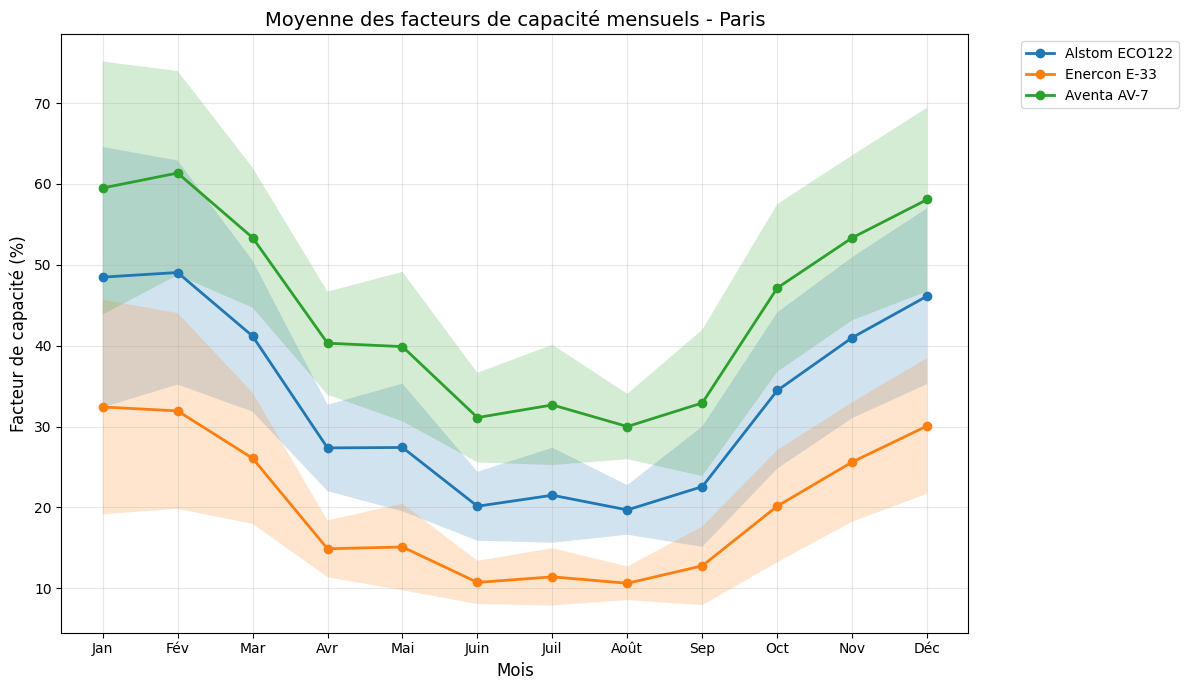

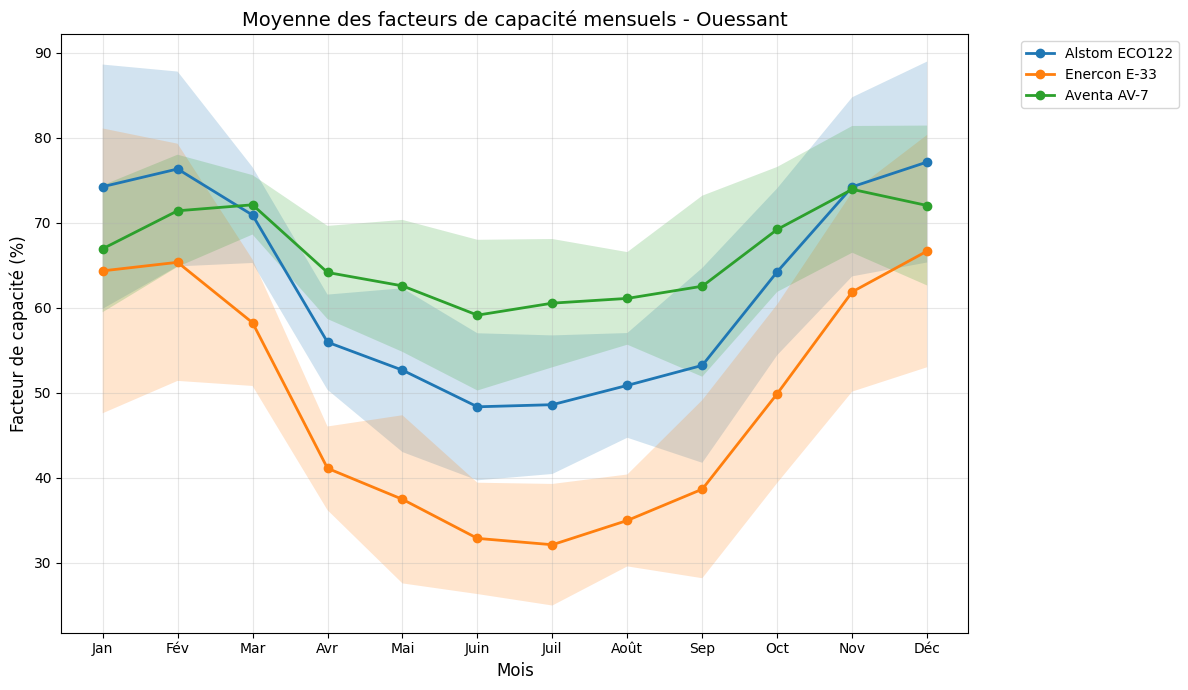

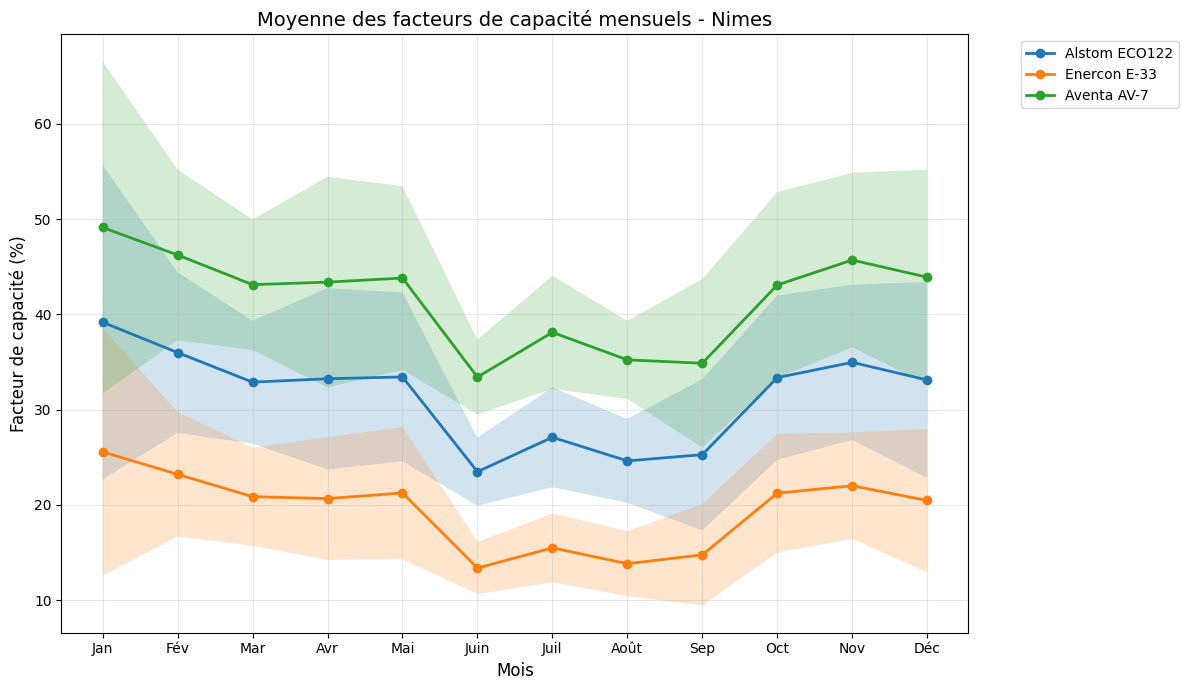

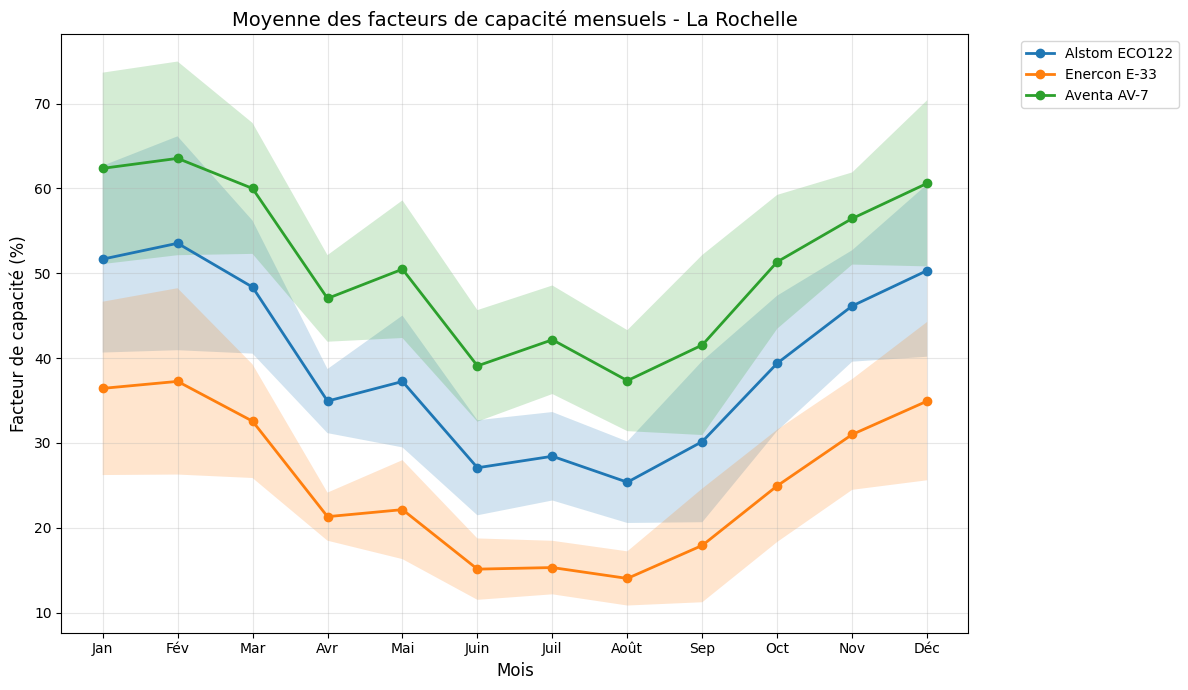

In [63]:
print("\n" + "="*40)
print("GRAPHIQUES DES FACTEURS DE CAPACITÉ MENSUELS")
print("="*40)
for city_name in locations:
    if city_name in energy_results and any(energy_results[city_name].values()):
        plot_capacity_vs_month(city_name)
    else:
        print(f"⏭️ {city_name} : pas de données valides")


### 2) Capacity factor in function of the year :


ANALYZING PARIS


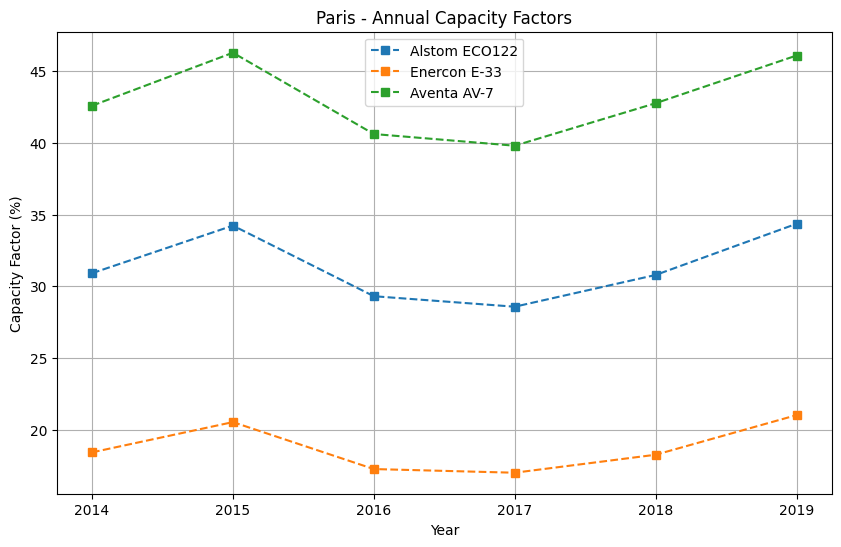


ANALYZING OUESSANT


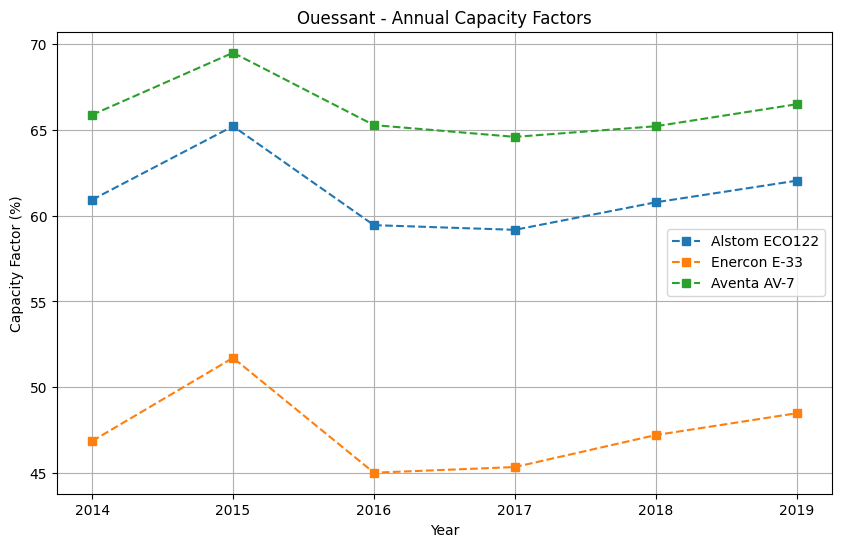


ANALYZING NIMES


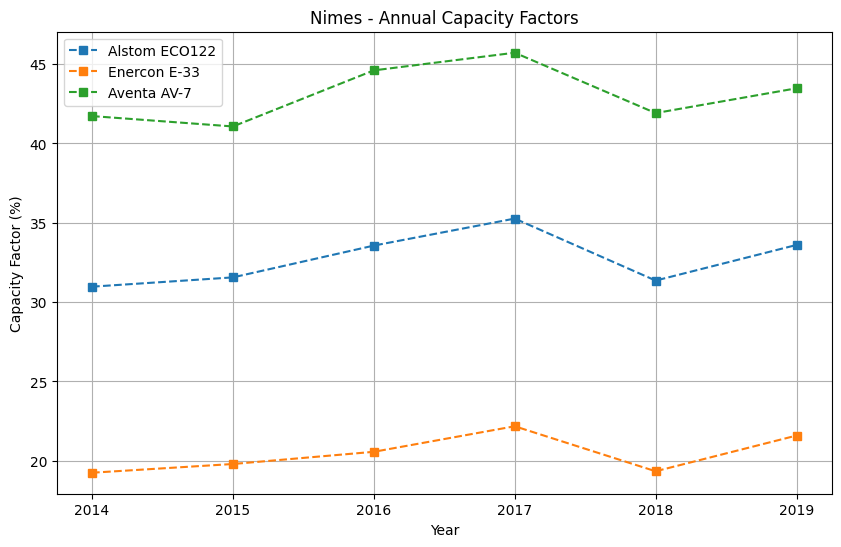


ANALYZING LA ROCHELLE


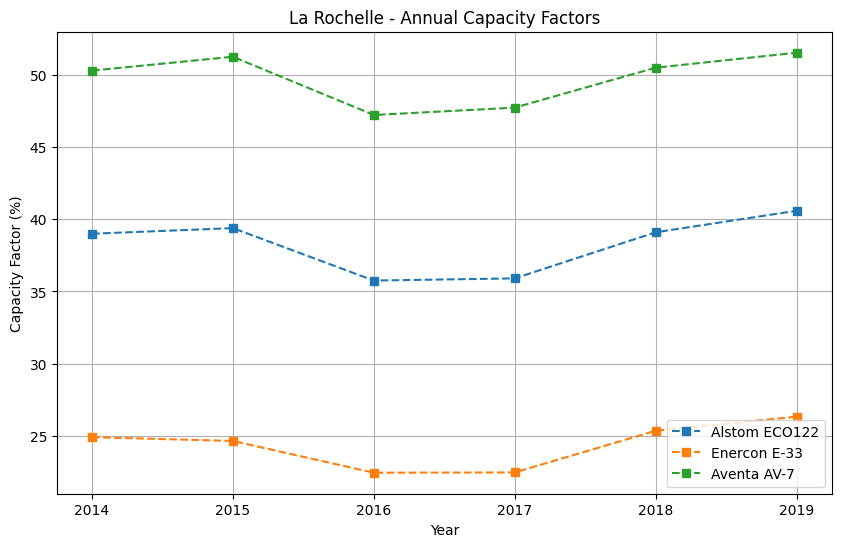

In [64]:
def analyze_annual_capacity(cities, years=[2014, 2015, 2016, 2017, 2018, 2019]):
    """Annual capacity factor analysis with trend plotting"""
    for city in cities:
        print(f"\n{'='*40}")
        print(f"ANALYZING {city.upper()}")
        print(f"{'='*40}")
        
        annual_cfs = pd.DataFrame()
        
        for year in years:
            try:
                # Get annual capacity factors from your data pipeline
                result = wind_analysis_pipeline(locations[city], city, year)
                year_data = {turbine: result['energy'].get(turbine, {}).get('capacity_factor', 0)*100 
                            for turbine in turbines}
                
                annual_cfs = pd.concat([
                    annual_cfs,
                    pd.DataFrame([year_data], index=[year])
                ])
                
            except Exception as e:
                print(f"Skipping {year}: {str(e)}")
                continue
        
        if not annual_cfs.empty:
            # Display formatted table
            display(annual_cfs.style.format("{:.1f}%").highlight_max(color='lightgreen'))
            
            # Plot annual trends
            plt.figure(figsize=(10, 6))
            for turbine in annual_cfs.columns:
                plt.plot(annual_cfs.index, annual_cfs[turbine], 's--', label=turbine)
            
            plt.title(f'{city} - Annual Capacity Factors')
            plt.xlabel('Year')
            plt.ylabel('Capacity Factor (%)')
            plt.grid(True)
            plt.legend()
            plt.show()
        else:
            print("No annual data available")

analyze_annual_capacity(['Paris', 'Ouessant', 'Nimes', 'La Rochelle'])


## How many wind turbines of each of those kinds would you need to install to safely power the town you have chosen with only wind turbines?

 populations (2024 data)
 Sources:

https://fr.wikipedia.org/wiki/D%C3%A9mographie_de_Paris 

https://ville-data.com/nombre-d-habitants/La-Rochelle-17-17300

https://fr.wikipedia.org/wiki/N%C3%AEmes

https://www.letelegramme.fr/finistere/ile-ouessant-29242/population-d-ouessant-nombre-d-habitants-carte-tous-les-chiffres-de-demographie-1689018.php

In [65]:
 populations = {
        'Paris': 2_113_705,
        'Ouessant': 854,
        'Nimes': 150_444,
        'La Rochelle': 80_196
    }

Calculate Annual Electricity Demand

In [66]:
# National average consumption per person (kWh/year)
consumption_per_person = 2223

# Calculate total annual demand for each city
annual_demand = {city: pop * consumption_per_person for city, pop in populations.items()}

for city, demand in annual_demand.items():
    print(f"{city}: Estimated annual demand = {demand:,.0f} kWh")


Paris: Estimated annual demand = 4,698,766,215 kWh
Ouessant: Estimated annual demand = 1,898,442 kWh
Nimes: Estimated annual demand = 334,437,012 kWh
La Rochelle: Estimated annual demand = 178,275,708 kWh


Calculate Number of Turbines Needed

In [67]:
# Calculate turbine requirements
turbine_requirements = {}

for city, demand in annual_demand.items():
    requirements = {}
    for turbine, output in turbine_specs.items():
        num_turbines = max(1, round(demand / output))
        requirements[turbine] = num_turbines
    turbine_requirements[city] = requirements

# Create and display table
turbine_table = pd.DataFrame(turbine_requirements).T
turbine_table.index.name = 'City'
turbine_table.columns.name = 'Turbine Model'
display(turbine_table)


Turbine Model  Alstom ECO122  Enercon E-33  Aventa AV-7
City                                                   
Paris                1740284      14238686    722887110
Ouessant                 703          5753       292068
Nimes                 123866       1013445     51451848
La Rochelle            66028        540229     27427032

## What choice would you make based on cost and feasibility?


### Estimated Investment Costs (Installed Cost per Turbine)

Sources for the prices :

https://westpenninesprotectiontrust.co.uk/wp-content/uploads/2012/06/PDF-101106-Enercon-E33-Flyer-energy-production-return-claimed.pdf

https://www.fcn.eonerc.rwth-aachen.de/global/show_document.asp?id=aaaaaaaaaagvvyb

we didnt find an exact price but the typical installed cost for 2–3 MW onshore turbines is €2–3 million per unit (see Wind Systems Magazine, wind-turbine-models.com, and project cost reports).

Alstom ECO122: ~€2.5 million per unit

Enercon E-33: ~€700,000 per unit

Aventa AV-7: ~€93,000 per unit

### Example: Total Cost for La Rochelle

Alstom ECO122: 66,028 × €2.5M = €165 billion

Enercon E-33: 540,229 × €700k = €378 billion

Aventa AV-7: 27,427,032 × €93k = €2 550 billion

### Feasibility Considerations


Space and Density: Large turbines (ECO122) require significant spacing but far fewer units. Small turbines (AV-7) would require hundreds of millions of units and an unrealistic amount of land or rooftop area.

Grid and Maintenance: Fewer, larger turbines are easier and cheaper to connect and maintain.

Urban Constraints: In dense cities like Paris, installing millions of large turbines or hundreds of millions of small ones is completely unfeasible due to space, noise, visual impact, and social acceptance.

Environmental and Visual Impact: Large turbines have a greater visual presence but deliver much higher output per unit and per land area.

### For mid-size and rural cities (La Rochelle, Nîmes, Ouessant):

Alstom ECO122 is the only technically and economically rational choice: it has the lowest total cost, requires far fewer units, and is easier to maintain and integrate into the grid.

Small turbines are not realistic at scale: they require hundreds of thousands to hundreds of millions of units, making the global cost and logistics unsustainable.

### For Paris:


No wind solution is realistic for full supply: even with the smallest models, the number of units required is completely out of reach, both spatially and logistically.

Wind can only be a minor supplement in dense urban areas: a few small turbines on rooftops may be possible, but the vast majority of electricity must come from other sources (grid, nuclear, solar, imports, offshore wind, etc.).

Conclusion
Large turbines (like ECO122) are the only technically and economically viable option for large-scale wind projects outside dense urban areas.

In dense cities, wind can only play a marginal role due to space, noise, and visual constraints.

Alstom ECO122 is the preferred choice for cost and feasibility in almost all cases except dense urban centers, where full wind supply is not realistic. For cities like Paris, wind can only be a minor supplement, and other energy sources or offshore wind should be prioritized.

## Assuming this electricity consumption is constant, what storage capacity should your town install to deal with periods without wind?



let's make some computation to get a close idea:

we need to find the Longest Period Without Sufficient Wind
let's Define “no wind” as wind speed below the cut-in speed of the turbines (typically 3 m/s for large turbines).

For each city, find the longest continuous period (in hours) where wind speed at hub height is below 3 m/s.

In [68]:
def longest_calm_period(df, turbine_name, turbines):
    """Returns the longest calm period (hours) below cut-in speed for a given turbine."""
    cut_in = turbines[turbine_name]['cut_in_speed']
    wind_col = f"wind_speed_{turbine_name.replace(' ', '_')}"
    calm = (df[wind_col] < cut_in).astype(int)
    # Find lengths of consecutive calm intervals
    calm_streaks = calm * (calm.groupby((calm != calm.shift()).cumsum()).cumcount() + 1)
    max_streak = calm_streaks.max() if not calm_streaks.empty else 0
    return max_streak * 0.5  # 0.5 hours per interval

# Example: calculate for all cities and turbines
calm_hours = {}
for city, df in turbine_wind_data.items():
    calm_hours[city] = {}
    for turbine_name in turbines:
        calm_hours[city][turbine_name] = longest_calm_period(df, turbine_name, turbines)


Calculate Storage Requirement
Storage needed = (average hourly demand) × (longest calm period in hours)

Average hourly demand = (annual demand) / 8760

In [69]:
storage_needed = {}
for city in populations:
    storage_needed[city] = {}
    annual_demand = populations[city] * 2223  # kWh/year
    hourly_demand = annual_demand / 8760      # kWh/hour
    for turbine_name in turbines:
        hours = calm_hours[city][turbine_name]
        storage_needed[city][turbine_name] = hours * hourly_demand


In [70]:
print("Estimated storage capacity needed (kWh) to cover the longest windless period:")
for city in storage_needed:
    print(f"\n{city}:")
    for turbine_name in turbines:
        print(f"  {turbine_name}: {storage_needed[city][turbine_name]:,.0f} kWh "
              f"(longest calm: {calm_hours[city][turbine_name]:.1f} h)")


Estimated storage capacity needed (kWh) to cover the longest windless period:

Paris:
  Alstom ECO122: 31,378,747 kWh (longest calm: 58.5 h)
  Enercon E-33: 31,915,136 kWh (longest calm: 59.5 h)
  Aventa AV-7: 19,846,387 kWh (longest calm: 37.0 h)

Ouessant:
  Alstom ECO122: 6,285 kWh (longest calm: 29.0 h)
  Enercon E-33: 6,502 kWh (longest calm: 30.0 h)
  Aventa AV-7: 4,984 kWh (longest calm: 23.0 h)

Nimes:
  Alstom ECO122: 1,527,110 kWh (longest calm: 40.0 h)
  Enercon E-33: 2,882,419 kWh (longest calm: 75.5 h)
  Aventa AV-7: 1,202,599 kWh (longest calm: 31.5 h)

La Rochelle:
  Alstom ECO122: 457,900 kWh (longest calm: 22.5 h)
  Enercon E-33: 763,167 kWh (longest calm: 37.5 h)
  Aventa AV-7: 376,496 kWh (longest calm: 18.5 h)


#### 1. Paris

Worst Case Requirement (Enercon E-33):  32 GWh over 59.5 hours, 

Equivalent to powering 3.2 million EU households for 1 hour


Paris should install at least 31,915,136 kWh (31.9 GWh) of storage to ensure supply during the longest calm period.

#### 2. Ouessant

Worst Case Requirement (Enercon E-33):  6.3 MWh over 30 hours

Ouessant should install at least 6,502 kWh (6.5 MWh).


#### 3. Nimes

Worst Case Requirement (Enercon E-33):
2.9 GWh over 75.5 hours

Nîmes should install at least 3 GWh .

#### 4. La Rochelle

Worst Case Requirement (Enercon E-33):
730 MWh over 37.5 hours

La Rochelle should install at least 763,167 kWh (0.76 GWh).

